# 𝕋𝕒𝕓𝕦 𝕤𝕖𝕒𝕣𝕔𝕙 𝕗𝕠𝕣 𝕘𝕣𝕒𝕡𝕙 𝕕𝕣𝕒𝕨𝕚𝕟𝕘
* Hierarchical Graph Drawing
* Drawing Graphs: Sugiyama framework
* Metaheuristic / Optimisation: Tabu Search (TB), Genetic Algorithm (GA), Simulated Annealing (SA) 


Other links:
* an evolutionary algorithm toolbox written in python: https://github.com/stromatolith/peabox/tree/master
* Metaheuristic Optimization framewoRK
* Gurobi Optimisation

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(9)

## networkx

In [2]:
import networkx as nx

## grandalf

In [3]:
from grandalf.graphs import Vertex,Edge,Graph,graph_core
from grandalf.layouts import SugiyamaLayout

## graphviz

In [4]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import graphviz

# Data

## read data

In [5]:
path = "C:/Users/Christina/Documents/datasceyence/examples/example_results/lightning_logs/exp1_oct_no_fc/version_0"
data = pd.read_csv(os.path.join(path, "out_final_test.csv"))
# data = pd.read_csv(os.path.join(path, "out_final_test.csv"))

mapper = {
    'entry' : 0,
    'decent1' : 1,
    'decent2' : 2,
    'decent3' : 3,
    'decent1x1' : 4
}

# source/target: m_n_l

data['source'] = [row['source']+'_'+str(mapper[row['target_group']]-1) for id, row in data.iterrows()]
data['target'] = [row['target']+'_'+str(mapper[row['target_group']]) for id, row in data.iterrows()]

print()
print(data.head(10))
print()
print(data.info())


  source   target target_group     value
0  0_0_0  10_10_1      decent1  0.777874
1  0_0_0    1_6_1      decent1  0.796513
2  0_0_0    2_1_1      decent1  0.516915
3  0_0_0  13_11_1      decent1  0.660863
4  0_0_0   14_1_1      decent1  0.564763
5  0_0_0   12_2_1      decent1  0.595013
6  0_0_0    2_3_1      decent1  0.455283
7  0_0_0   8_15_1      decent1  0.461863
8  1_6_1   13_0_2      decent2  0.249068
9  2_3_1   13_0_2      decent2  0.248630

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   source        204 non-null    object 
 1   target        204 non-null    object 
 2   target_group  204 non-null    object 
 3   value         204 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.5+ KB
None


## unique target points

In [6]:
data['target'].items

<bound method Series.items of 0      10_10_1
1        1_6_1
2        2_1_1
3      13_11_1
4       14_1_1
        ...   
199      2_7_4
200      2_7_4
201      2_7_4
202      2_7_4
203      2_7_4
Name: target, Length: 204, dtype: object>

In [7]:

data.info()

#data_unique_viz = data_unique.loc[data_unique['target'].isin(data['source'])]
#data_unique = data_unique_viz

print(data['target'])

dopping_list = []


# drop disconnected nodes
for i_r, row in data.iterrows():
    
    if row['source'] not in list(data['target']) and not( row['target_group'] == 'decent1'):
        print('drop', row['source'], row['target'], row['target_group'])
        # data = data.drop(i_r) # 9_13_2
        dopping_list.append(i_r)

    if row['target'] not in list(data['source']) and not(row['target_group'] == 'decent1x1' ):
        print('drop', row['source'], row['target'], row['target_group'])
        dopping_list.append(i_r)
    
    '''
    if not( row['target_group'] == 'decent1' or row['target_group'] == 'decent1x1' ):
            
        if row['source'] not in list(data['target']):
            print('drop', row['source'], row['target'], row['target_group'])
            # data = data.drop(i_r) # 9_13_2
            dopping_list.append(i_r)
            
        if row['target'] not in list(data['source']):
            print('drop', row['source'], row['target'], row['target_group'])
            dopping_list.append(i_r)
    '''

            
data = data.drop(dopping_list) # 9_13_2

            
data.info()            
            
data_unique = data.drop_duplicates(subset=["target", "target_group"], keep='first')

data_unique_viz = data_unique
            
data_unique.info()
data_unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   source        204 non-null    object 
 1   target        204 non-null    object 
 2   target_group  204 non-null    object 
 3   value         204 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.5+ KB
0      10_10_1
1        1_6_1
2        2_1_1
3      13_11_1
4       14_1_1
        ...   
199      2_7_4
200      2_7_4
201      2_7_4
202      2_7_4
203      2_7_4
Name: target, Length: 204, dtype: object
drop 0_0_0 12_2_1 decent1
drop 9_13_2 5_8_3 decent3
drop 10_5_2 12_12_3 decent3
drop 9_13_2 5_14_3 decent3
drop 10_5_2 14_13_3 decent3
drop 10_5_2 14_13_3 decent3
drop 14_16_2 14_13_3 decent3
drop 7_8_2 14_13_3 decent3
drop 9_10_2 14_13_3 decent3
drop 10_5_2 14_7_3 decent3
drop 0_16_2 11_16_3 decent3
drop 7_8_2 11_16_3 decent3
drop 3_3_2 11_16_3 decent3
drop 9_13_2 11_16_3 dece

,source,target,target_group,value
0,0_0_0,10_10_1,decent1,0.777874
1,0_0_0,1_6_1,decent1,0.796513
2,0_0_0,2_1_1,decent1,0.516915
3,0_0_0,13_11_1,decent1,0.660863
4,0_0_0,14_1_1,decent1,0.564763
6,0_0_0,2_3_1,decent1,0.455283
7,0_0_0,8_15_1,decent1,0.461863
8,1_6_1,13_0_2,decent2,0.249068
10,8_15_1,13_6_2,decent2,0.281259
11,14_1_1,9_7_2,decent2,0.262756


# Layouts / Algorithms
* Layer
* SugiyamaLayout
* DigcoLayout

## networkx drawing layout algorithms

In [8]:
def get_nx_layout(pos_mode, graph):
    # algorithm for position
    if pos_mode == 'spring' or pos_mode == 0:
        pos = nx.drawing.spring_layout(graph, k=0.70, iterations=60)
    elif pos_mode == 'kamada' or pos_mode == 1:
        pos = nx.drawing.kamada_kawai_layout(graph)
    elif pos_mode == 'circular' or pos_mode == 2:
        pos = nx.drawing.circular_layout(graph)
    else:
        pos = nx.drawing.shell_layout(graph)
    return pos

# xx pos = nx.drawing.spectral_layout(G)
# xx pos = nx.drawing.spiral_layout(G)
# x pos = nx.drawing.multipartite_layout(G)
# x pos = nx.drawing.planar_layout(G)
# pos = nx.drawing.random_layout(G)

## Sugiyama
* The Sugiyama layout is the traditional "layered" graph layout called *dot* in graphviz.
* dot layout engine - hierarchical or layered drawings of directed graphs
* https://graphviz.org/docs/layouts/dot/

In [9]:
def get_graphviz_layout(pos_mode):
    # https://graphviz.org/docs/layouts/

    engine = None
    
    # 'circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi'
    if pos_mode == 0:
        engine='dot' 
    elif pos_mode == 1:
        engine='neato'  
    elif pos_mode == 2:
        engine='fdp'  
    elif pos_mode == 3:
        # not working
        engine='sfdp'  
    elif pos_mode == 4:
        engine='circo'  
    elif pos_mode == 5:
        engine='twopi'  
    elif pos_mode == 6:
        engine='osage'
    #elif mode == 7:
    #    dot = graphviz.Digraph('round-table', comment='The Round Table', engine='nop2')  
    elif mode == 8:
        engine='patchwork'

    return engine

# Optimiser/Metaheuristic

## Tabu search

# Graphs

## Single Graph (networkx)
* https://www.kaggle.com/code/mayeesha/network-analysis-for-dummies-stackoverflow-data

In [10]:
nx_G = nx.Graph()

In [11]:
# add nodes
for index, row in data_unique.iterrows():
    
    nx_G.add_node(row["target"], group=row["target_group"], nodesize = 100)
    
        
# first layer  
nx_G.add_node('0_0_0', group="entry", nodesize=100)


# last layer

In [12]:
# add edges
for index, row in data.iterrows():
    nx_G.add_edge(row["source"], row["target"], weight=row["value"], group=row['target_group'])
    
        
    

In [13]:
nx_G.nodes(data=True)

NodeDataView({'10_10_1': {'group': 'decent1', 'nodesize': 100}, '1_6_1': {'group': 'decent1', 'nodesize': 100}, '2_1_1': {'group': 'decent1', 'nodesize': 100}, '13_11_1': {'group': 'decent1', 'nodesize': 100}, '14_1_1': {'group': 'decent1', 'nodesize': 100}, '2_3_1': {'group': 'decent1', 'nodesize': 100}, '8_15_1': {'group': 'decent1', 'nodesize': 100}, '13_0_2': {'group': 'decent2', 'nodesize': 100}, '13_6_2': {'group': 'decent2', 'nodesize': 100}, '9_7_2': {'group': 'decent2', 'nodesize': 100}, '0_16_2': {'group': 'decent2', 'nodesize': 100}, '12_6_2': {'group': 'decent2', 'nodesize': 100}, '14_16_2': {'group': 'decent2', 'nodesize': 100}, '7_8_2': {'group': 'decent2', 'nodesize': 100}, '16_3_2': {'group': 'decent2', 'nodesize': 100}, '3_3_2': {'group': 'decent2', 'nodesize': 100}, '7_7_2': {'group': 'decent2', 'nodesize': 100}, '9_10_2': {'group': 'decent2', 'nodesize': 100}, '16_14_2': {'group': 'decent2', 'nodesize': 100}, '6_8_2': {'group': 'decent2', 'nodesize': 100}, '11_10_2':

In [14]:
nx.is_connected(nx_G)

True

In [15]:
nx.number_connected_components(nx_G)

1

In [16]:
# maximum_connected_component = max(nx.connected_component_subgraphs(nx_G), key=len)

In [17]:


# todo, currently need to remove this by hand!!

for n,d in nx_G.nodes(data=True):
    print(n,d)

nx_G.nodes()

10_10_1 {'group': 'decent1', 'nodesize': 100}
1_6_1 {'group': 'decent1', 'nodesize': 100}
2_1_1 {'group': 'decent1', 'nodesize': 100}
13_11_1 {'group': 'decent1', 'nodesize': 100}
14_1_1 {'group': 'decent1', 'nodesize': 100}
2_3_1 {'group': 'decent1', 'nodesize': 100}
8_15_1 {'group': 'decent1', 'nodesize': 100}
13_0_2 {'group': 'decent2', 'nodesize': 100}
13_6_2 {'group': 'decent2', 'nodesize': 100}
9_7_2 {'group': 'decent2', 'nodesize': 100}
0_16_2 {'group': 'decent2', 'nodesize': 100}
12_6_2 {'group': 'decent2', 'nodesize': 100}
14_16_2 {'group': 'decent2', 'nodesize': 100}
7_8_2 {'group': 'decent2', 'nodesize': 100}
16_3_2 {'group': 'decent2', 'nodesize': 100}
3_3_2 {'group': 'decent2', 'nodesize': 100}
7_7_2 {'group': 'decent2', 'nodesize': 100}
9_10_2 {'group': 'decent2', 'nodesize': 100}
16_14_2 {'group': 'decent2', 'nodesize': 100}
6_8_2 {'group': 'decent2', 'nodesize': 100}
11_10_2 {'group': 'decent2', 'nodesize': 100}
7_3_3 {'group': 'decent3', 'nodesize': 100}
17_14_3 {'grou

NodeView(('10_10_1', '1_6_1', '2_1_1', '13_11_1', '14_1_1', '2_3_1', '8_15_1', '13_0_2', '13_6_2', '9_7_2', '0_16_2', '12_6_2', '14_16_2', '7_8_2', '16_3_2', '3_3_2', '7_7_2', '9_10_2', '16_14_2', '6_8_2', '11_10_2', '7_3_3', '17_14_3', '5_8_3', '0_7_3', '12_12_3', '5_14_3', '12_14_3', '15_8_3', '14_7_3', '1_11_3', '0_13_3', '12_0_3', '0_2_3', '7_14_3', '11_13_3', '5_13_3', '13_8_3', '4_1_3', '13_3_3', '1_2_3', '2_15_3', '11_10_3', '2_7_3', '5_14_4', '7_9_4', '8_16_4', '2_7_4', '0_0_0'))

## Layered graph (networkx)
* https://stackoverflow.com/questions/57378631/modifying-a-multilayer-network-plot-in-pymnet

In [18]:
unique_layers = data['target_group'].unique()

nx_layer_list = []

# entry layer (input node)
nx_layer_list.append((nx.Graph(), (0, 0), "#ffaaaa", 'entry'))

# decent layers
for this_layer in unique_layers:
    nx_layer_list.append((nx.Graph(), (0, mapper[this_layer]), "#ffaaaa", this_layer))
    
# node ranges in the graph
# ranges = [(0, 6), (6, 15), (15, 20), (20, 30)]

# fill the layers with nodes from the graph
# prepare the color map
# color_map = []
for (layer, _, _, name) in nx_layer_list:
    try:
        
        selected_nodes = [n for n,v in nx_G.nodes(data=True) if v['group'] == name]  
        # print(selected_nodes)
    
        layer.add_nodes_from(selected_nodes) # nx_G
    except:
        print("node is not connected, this is due to the data and not a problem")
        
    print('layer', name, 'nodes:', layer.nodes)
#print(nx_layer_list[0].nodes)

print("nx_G nodes:", nx_G.nodes())

layer entry nodes: ['0_0_0']
layer decent1 nodes: ['10_10_1', '1_6_1', '2_1_1', '13_11_1', '14_1_1', '2_3_1', '8_15_1']
layer decent2 nodes: ['13_0_2', '13_6_2', '9_7_2', '0_16_2', '12_6_2', '14_16_2', '7_8_2', '16_3_2', '3_3_2', '7_7_2', '9_10_2', '16_14_2', '6_8_2', '11_10_2']
layer decent3 nodes: ['7_3_3', '17_14_3', '5_8_3', '0_7_3', '12_12_3', '5_14_3', '12_14_3', '15_8_3', '14_7_3', '1_11_3', '0_13_3', '12_0_3', '0_2_3', '7_14_3', '11_13_3', '5_13_3', '13_8_3', '4_1_3', '13_3_3', '1_2_3', '2_15_3', '11_10_3', '2_7_3']
layer decent1x1 nodes: ['5_14_4', '7_9_4', '8_16_4', '2_7_4']
nx_G nodes: ['10_10_1', '1_6_1', '2_1_1', '13_11_1', '14_1_1', '2_3_1', '8_15_1', '13_0_2', '13_6_2', '9_7_2', '0_16_2', '12_6_2', '14_16_2', '7_8_2', '16_3_2', '3_3_2', '7_7_2', '9_10_2', '16_14_2', '6_8_2', '11_10_2', '7_3_3', '17_14_3', '5_8_3', '0_7_3', '12_12_3', '5_14_3', '12_14_3', '15_8_3', '14_7_3', '1_11_3', '0_13_3', '12_0_3', '0_2_3', '7_14_3', '11_13_3', '5_13_3', '13_8_3', '4_1_3', '13_3_3',

In [19]:
for n,v in nx_G.nodes(data=True):
    print(v)

{'group': 'decent1', 'nodesize': 100}
{'group': 'decent1', 'nodesize': 100}
{'group': 'decent1', 'nodesize': 100}
{'group': 'decent1', 'nodesize': 100}
{'group': 'decent1', 'nodesize': 100}
{'group': 'decent1', 'nodesize': 100}
{'group': 'decent1', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent2', 'nodesize': 100}
{'group': 'decent3', 'nodesize': 100}
{'group': 'decent3', 'nodesize': 100}
{'group': 'decent3', 'nodesize': 100}
{'group': 'decent3', 'nodesize': 100}
{'group': 'decent3', 'nodesize': 100}
{'group': 'd

## Single Graph (grandalf)

In [20]:
nodes_tmp = [Vertex(data) for data in range(10)]
print(nodes_tmp)
print()

X = [(0,1),(0,2),(1,3),(2,3),(4,0),(1,4),(4,5),(5,6),(3,6),(3,7),(6,8), (7,8),(8,9),(5,9)]
print(X)
print()

E = [Edge(nodes_tmp[v],nodes_tmp[w]) for (v,w) in X]
for (v,w) in X:
    print(v, nodes_tmp[v])
    
print()  
print('E', E)

print()
print(E[7].v[0].data)
print(E[7].v[1].data)
print()

grandalf_G = Graph(nodes_tmp, E)
print(grandalf_G)
print()

print(grandalf_G.C)

[<grandalf.graphs.Vertex object at 0x000001EB8DEFF940>, <grandalf.graphs.Vertex object at 0x000001EB8DF0DD60>, <grandalf.graphs.Vertex object at 0x000001EB8DF0DC40>, <grandalf.graphs.Vertex object at 0x000001EB8DF0D070>, <grandalf.graphs.Vertex object at 0x000001EB8DF0D0D0>, <grandalf.graphs.Vertex object at 0x000001EB8DF0D460>, <grandalf.graphs.Vertex object at 0x000001EB8DF0DA00>, <grandalf.graphs.Vertex object at 0x000001EB8DF0DA60>, <grandalf.graphs.Vertex object at 0x000001EB8DF0D5B0>, <grandalf.graphs.Vertex object at 0x000001EB8DF0D550>]

[(0, 1), (0, 2), (1, 3), (2, 3), (4, 0), (1, 4), (4, 5), (5, 6), (3, 6), (3, 7), (6, 8), (7, 8), (8, 9), (5, 9)]

0 <grandalf.graphs.Vertex object at 0x000001EB8DEFF940>
0 <grandalf.graphs.Vertex object at 0x000001EB8DEFF940>
1 <grandalf.graphs.Vertex object at 0x000001EB8DF0DD60>
2 <grandalf.graphs.Vertex object at 0x000001EB8DF0DC40>
4 <grandalf.graphs.Vertex object at 0x000001EB8DF0D0D0>
1 <grandalf.graphs.Vertex object at 0x000001EB8DF0DD60

In [21]:

# every node one time, but the 0_0_0 is missing
nodes = [Vertex(t) for t in data_unique['target']]
nodes.insert(0, Vertex('0_0_0'))


# edge pairs between source and target
e = [ (s, t) for (s, t) in zip(data['source'], data['target'] ) ]

# generate the actual edge
i_source = 0
i_target = 1
edges = [Edge(nodes[i_source], nodes[i_target]) for i_e in range(len(e))]

#print(edges[0].data)

# e[i_e][0], e[i_e][1]

edge_list = []

for i_e in range(len(e)):

    n_s = [n for n in nodes if n.data == e[i_e][0] ]
    n_t = [n for n in nodes if n.data == e[i_e][1] ]
    #print(n_s[0].data)
    #print(n_t[0].data)
    #print("ok")
    
    # print(Edge(n_s, n_t))
    try:
        edge_list.append(Edge(n_s[0], n_t[0]))
    except:
        print("node is not connected, this is due to the data and not a problem")
    
    # e[i_e][0]
    # e[i_e][1]
    #i_source = 0
    #print(i_source)
    #i_target = 1
    #print(i_target)
    #print( Edge(nodes[i_source], nodes[i_target]) )

#print(i_e)
#print(edge_list)

print()
print(nodes[0].data)
print(edge_list[0].v[0].data)
print(edge_list[0].v[1].data)


grandalf_G = Graph(nodes, edge_list)

print(grandalf_G.C)

"""
V = [Vertex(data) for data in range(10)]
X = [(0,1),(0,2),(1,3),(2,3),(4,0),(1,4),(4,5),(5,6),(3,6),(3,7),(6,8), (7,8),(8,9),(5,9)]

E = [Edge(V[v],V[w]) for (v,w) in X]
g = Graph(V,E)

print(g.C)
"""


0_0_0
0_0_0
10_10_1


'\nV = [Vertex(data) for data in range(10)]\nX = [(0,1),(0,2),(1,3),(2,3),(4,0),(1,4),(4,5),(5,6),(3,6),(3,7),(6,8), (7,8),(8,9),(5,9)]\n\nE = [Edge(V[v],V[w]) for (v,w) in X]\ng = Graph(V,E)\n\nprint(g.C)\n'

## Sugiyama Layered Graph (graphviz - dot)

In [22]:
mode = 0

dot_G = graphviz.Digraph('Sugiyama', comment='Sugiyama', engine=get_graphviz_layout(mode), graph_attr={"pad":"1", "nodesep":"0.6", "ranksep":"5"})  

dot_G.node('0_0_0')

for i_n, n in data_unique_viz.iterrows():
    
    if n['target_group'] == 'decent1':
        c = 'hotpink'
    elif n['target_group'] == 'decent2':    
        c = 'turquoise'
    elif n['target_group'] == 'decent3':    
        c = 'darkorange'
    else:
        c = 'white'
    
    dot_G.node(n['target'], fixedsize='shape', fillcolor=c,  style='filled')

for i_e, e in data.iterrows(): 
    # print(d['value'])
    
    #print(e['source'])
    #print(data_unique_viz['target'])
    
    if (data_unique_viz['target'].str.contains(e['source']).any() and data_unique_viz['target'].str.contains(e['target']).any() ) \
    or (e['source'] == '0_0_0' and data_unique_viz['target'].str.contains(e['target']).any())\
    or e['target_group'] == 'decent1x1':
        #if e['source'] in data_unique_viz['target']:
        if e['target_group'] == 'decent1x1':
            dot_G.edge(e['source'], e['target'], weight='10' )
        elif False:
            dot_G.edge(e['source'], e['target'], weight=str(e['value'] ) )
        else:
            dot_G.edge(e['source'], e['target'] , weight='1')


In [23]:
if False:
    mode = 0

    dot_G = graphviz.Digraph('Sugiyama', comment='Sugiyama', engine=get_graphviz_layout(mode), graph_attr={"pad":"1", "nodesep":"0.6", "ranksep":"5"})  

    dot_G.node('0_0_0')

    for i_n, n in data_unique_viz.iterrows():

        if n['target_group'] == 'decent1':
            c = 'hotpink'
        elif n['target_group'] == 'decent2':    
            c = 'turquoise'
        elif n['target_group'] == 'decent3':    
            c = 'darkorange'
        else:
            c = 'white'

        dot_G.node(n['target'], fixedsize='shape', fillcolor=c,  style='filled')

    for i_e, e in data.iterrows(): 
        # print(d['value'])

        #print(e['source'])
        #print(data_unique_viz['target'])


            #if e['source'] in data_unique_viz['target']:
            if e['target_group'] == 'decent1x1':
                dot_G.edge(e['source'], e['target'])
            elif False:
                dot_G.edge(e['source'], e['target'], weight=str(e['value'] ) )
            else:
                pass
                # dot_G.edge(e['source'], e['target'] , weight='1')


# Draw

## run graphviz - dot: Sugiyama

In [24]:
# print(dot.source) 

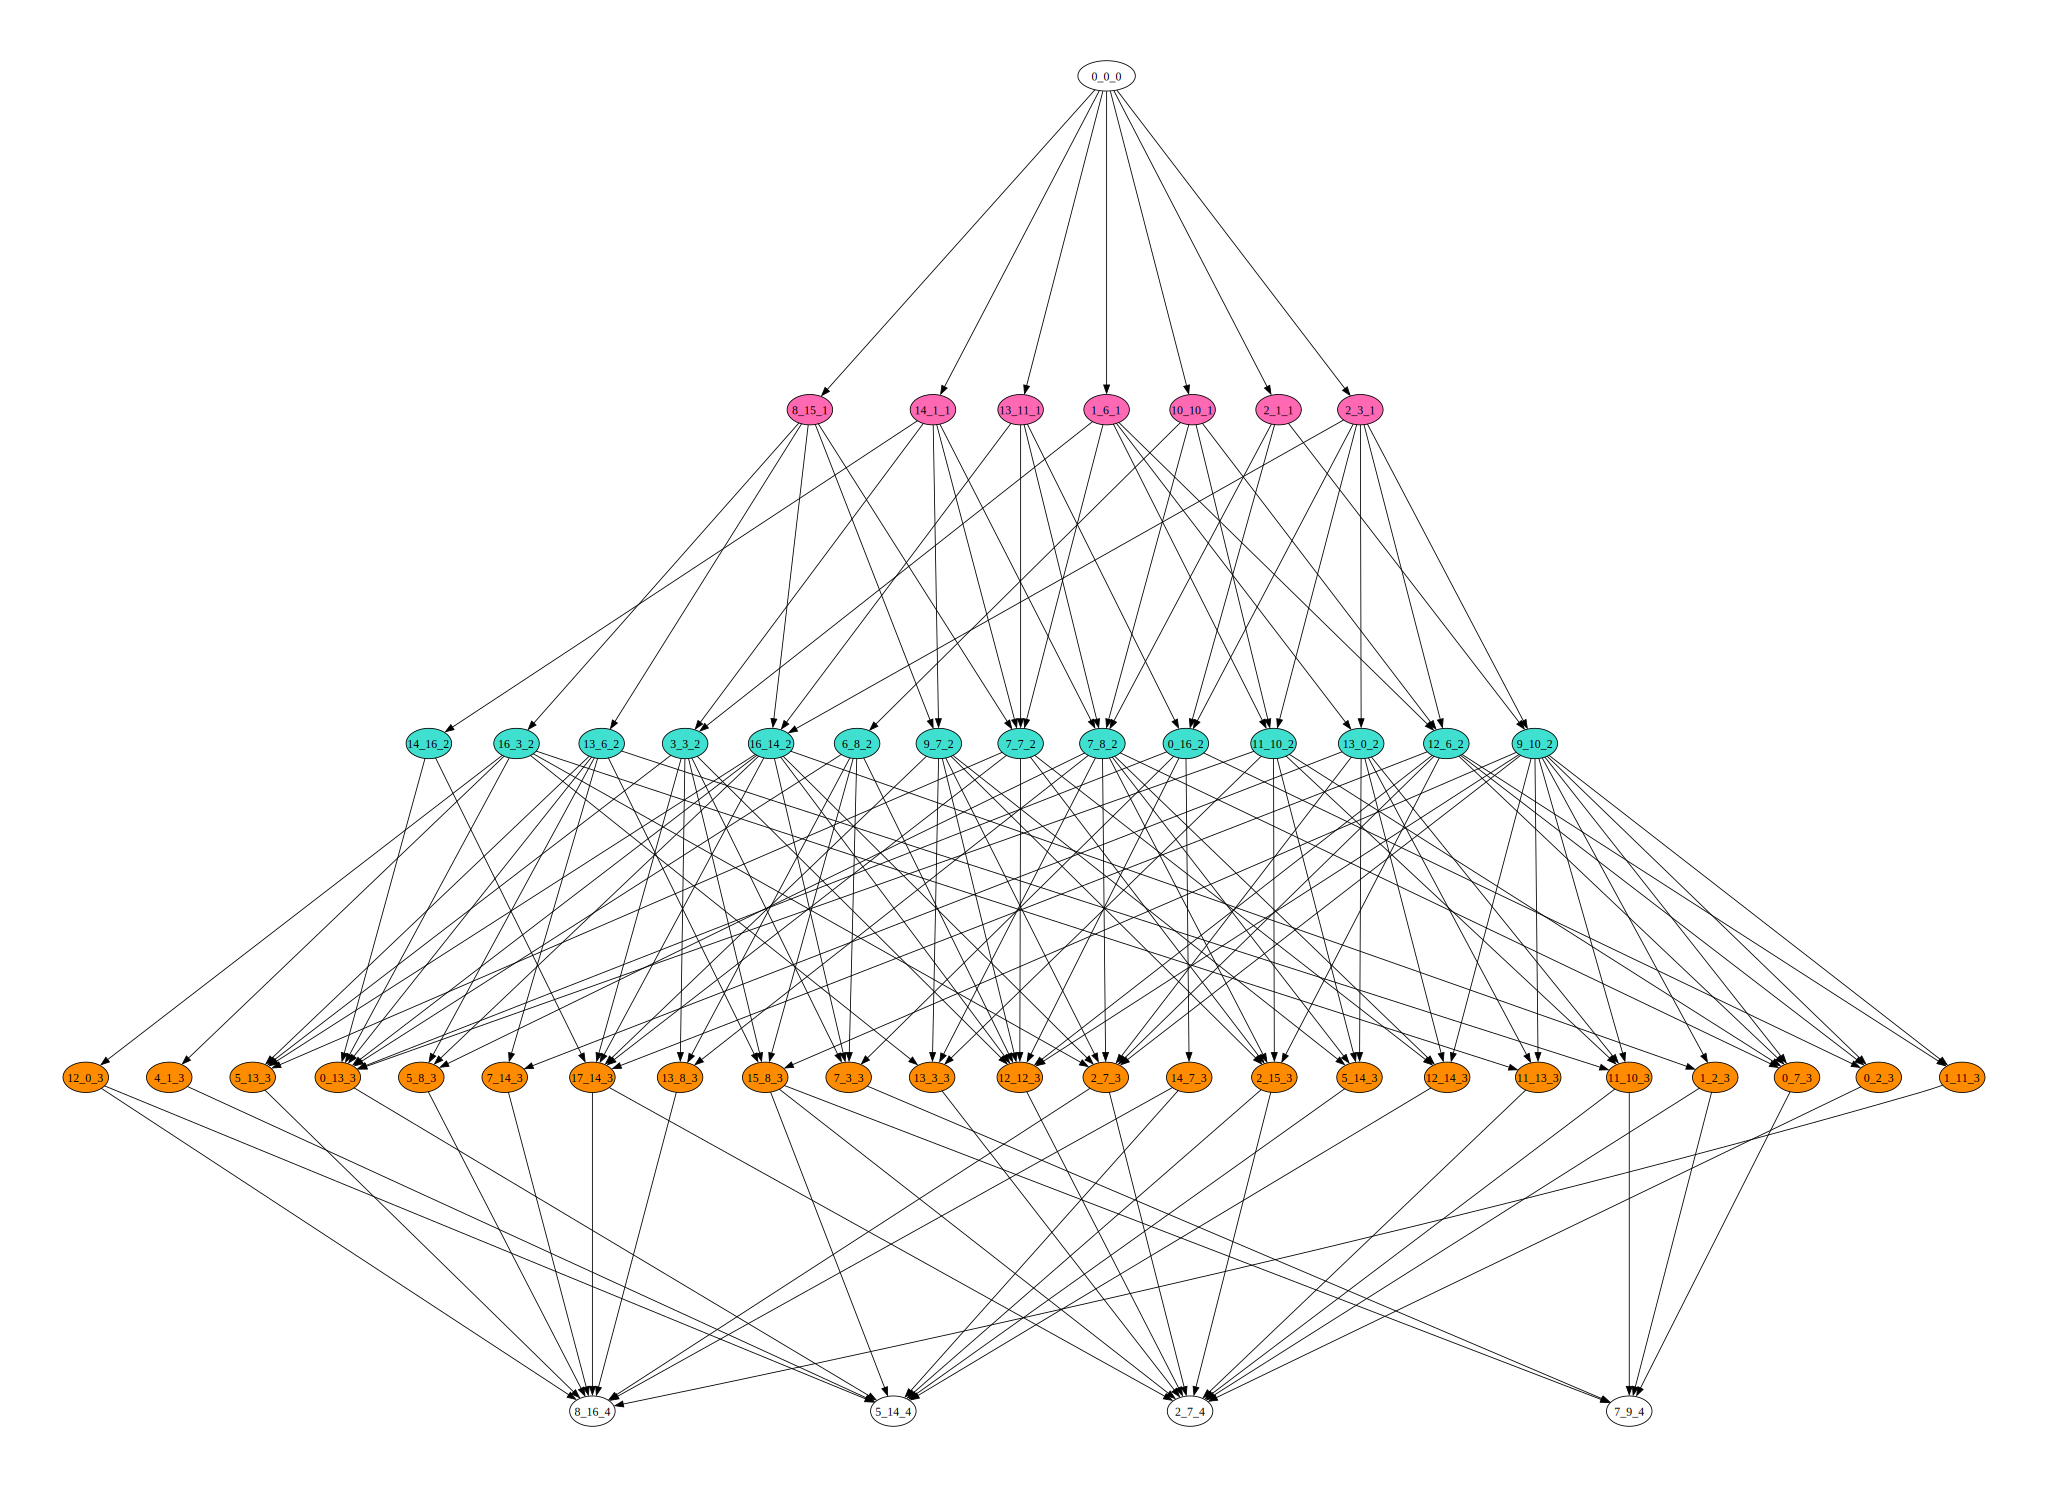

In [25]:
dot_G.render(filename=os.path.join(path, 'graphviz_dot_sugiyama'))

dot_G

## run grandalf: Sugiyama
* https://github.com/bdcht/grandalf

In [26]:
from grandalf.graphs import Vertex,Edge,Graph,graph_core
from grandalf.layouts import SugiyamaLayout

"""
V = [Vertex(data) for data in range(10)]
X = [(0,1),(0,2),(1,3),(2,3),(4,0),(1,4),(4,5),(5,6),(3,6),(3,7),(6,8), (7,8),(8,9),(5,9)]

E = [Edge(V[v],V[w]) for (v,w) in X]
g = Graph(V,E)

print(g.C)
"""

print('example:', [v.data for v in grandalf_G.path(nodes[0], nodes[1])])
print('example:', [v.data for v in grandalf_G.path(nodes[5], nodes[7])])


"""
g.add_edge(Edge(V[9],Vertex(10)))
#<grandalf.graphs.Edge object at 0x7fb23a95e3a0>
g.remove_edge(V[5].e_to(V[9]))
#<grandalf.graphs.Edge object at 0x7fb23a95e0a0>
print([v.data for v in g.path(V[1],V[9])])
#[1, 3, 6, 8, 9]
g.remove_vertex(V[8])
#<grandalf.graphs.Vertex object at 0x7fb23a933dc0>
len(g.C)
#2
print(g.path(V[1],V[9]))
#None
for e in g.C[1].E(): print("%s -> %s"%(e.v[0].data,e.v[1].data))
#...
#9 -> 10
"""

class defaultview(object):
    w, h = 18, 18
    
for v in nodes: v.view = defaultview()

sug = SugiyamaLayout(grandalf_G.C[0])
sug.init_all() # roots=[edges[0]],inverted_edges=[edges[1].e_to(edges[0])]) # 
#sug.init_all(roots=[V[0]],inverted_edges=[V[4].e_to(V[0])])
sug.draw()

x_data = []
y_data = []

print("s nodes ??")
try:
    for v in grandalf_G.C[0].sV: print("%s: (%d,%d)"%(v.data,v.view.xy[0],v.view.xy[1]))
except:
    for v in grandalf_G.C[0].sV: print("%s:"%(v.data))

for v in grandalf_G.C[0].sV:
    x_data.append(int(v.view.xy[0]))
    y_data.append(int(v.view.xy[1]))
    

print("layers")
for l in sug.layers:
    for n in l: print(n.view.xy,end='')
    print('')

print("long edges")
for e,d in sug.ctrls.items():
    print('long edge %s --> %s points:'%(e.v[0].data,e.v[1].data))
    for r,v in d.items(): print("%s %s %s"%(v.view.xy,'at rank',r))
    
    
source_x = []
source_y = []

target_x = []
target_y = []


for a in grandalf_G.C[0].sE:
    # edge has two vertices and each has x and y
    # print(a.v[0].view.xy[0], a.v[0].view.xy[1])
    # print(a.v[1].view.xy[0], a.v[0].view.xy[1])
    
    source_x.append(a.v[0].view.xy[0])
    source_y.append(a.v[0].view.xy[1])
    
    target_x.append(a.v[1].view.xy[0])
    target_y.append(a.v[1].view.xy[1])
    

layer =  list(np.unique(source_y +   target_y))

example: ['0_0_0', '10_10_1']
example: ['14_1_1', '0_0_0', '8_15_1']
s nodes ??
0_0_0: (0,9)
10_10_1: (-114,47)
1_6_1: (-38,47)
2_1_1: (-190,47)
13_11_1: (76,47)
14_1_1: (323,47)
2_3_1: (-247,47)
8_15_1: (418,47)
13_0_2: (-190,85)
13_6_2: (456,85)
9_7_2: (380,85)
0_16_2: (-114,85)
12_6_2: (-76,85)
14_16_2: (342,85)
7_8_2: (0,85)
16_3_2: (418,85)
3_3_2: (266,85)
7_7_2: (304,85)
9_10_2: (-399,85)
16_14_2: (57,85)
6_8_2: (-38,85)
11_10_2: (-152,85)
7_3_3: (-114,123)
17_14_3: (342,123)
5_8_3: (380,123)
0_7_3: (-380,123)
12_12_3: (19,123)
5_14_3: (-152,123)
12_14_3: (-228,123)
15_8_3: (171,123)
14_7_3: (-342,123)
1_11_3: (-513,123)
0_13_3: (247,123)
12_0_3: (494,123)
0_2_3: (-418,123)
7_14_3: (209,123)
11_13_3: (-190,123)
5_13_3: (418,123)
13_8_3: (57,123)
4_1_3: (456,123)
13_3_3: (285,123)
1_2_3: (-304,123)
2_15_3: (133,123)
11_10_3: (-266,123)
2_7_3: (-19,123)
5_14_4: (19,161)
7_9_4: (-342,161)
8_16_4: (57,161)
2_7_4: (-57,161)
layers
(0.0, 9.0)
(-247.0, 47.0)(-190.0, 47.0)(-114.0, 47.0)(

[9.0, 47.0, 85.0, 123.0, 161.0]







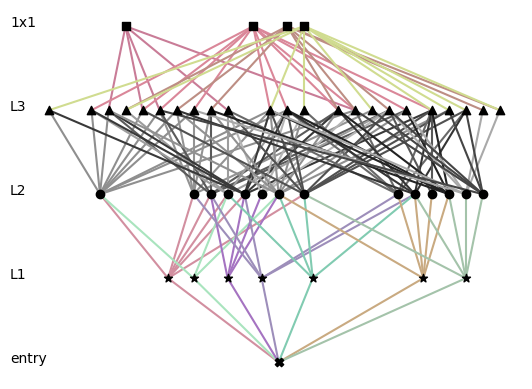

In [27]:
# =============================================================================
# generate list of grey values
# =============================================================================
min_gray_value, max_gray_value = 20, 190

# Calculate the step size
step = (max_gray_value - min_gray_value) / 99

# Generate ascending gray values
ascending_gray_values = ["#{:02X}{:02X}{:02X}".format(int(min_gray_value + i * step),
                                                     int(min_gray_value + i * step),
                                                     int(min_gray_value + i * step))
                         for i in range(100)]

random.shuffle(ascending_gray_values)

# =============================================================================
# generate list of colours
# =============================================================================
# Function to generate a slightly darker pastel color
def generate_slightly_darker_pastel():
    base_color = random.randint(210, 235)  # Higher values for lighter base colors
    r = random.randint(0, 100)
    g = random.randint(0, 100)
    b = random.randint(0, 100)
    return "#{:02X}{:02X}{:02X}".format(base_color - r, base_color - g, base_color - b)

# Generate 400 slightly darker pastel colors
color_map = [generate_slightly_darker_pastel() for _ in range(400)]

random.shuffle(color_map)
random.shuffle(color_map)
random.shuffle(color_map)


# =============================================================================
# init
# =============================================================================
grandalf_layer_list = list(np.unique(source_y + target_y))
print(grandalf_layer_list)
plt.figure()

# =============================================================================
# Nodes
# =============================================================================
marker = ['X', '*', 'o', '^', 's']

for i_l, (l, c) in enumerate(zip(sug.layers, color_map)):
    for n in l: 
        plt.scatter(np.array(n.view.xy[0]), np.array(n.view.xy[1]), marker=marker[i_l], c='#000000', zorder=3) # (n.view.xy,end='')
    print('')


# =============================================================================
# layer 0 - connections
# =============================================================================
prev_b = None
counter = 0
df = pd.DataFrame({'a': source_x, 'b':target_x,  'c':source_y, 'd':target_y}).sort_values(by=['b'])   

for i_row, row in df.iterrows():
    this_layer = grandalf_layer_list.index(row['c'])
    
    if this_layer == 0:
        if prev_b != row['b']: # new node
            prev_b = row['b']
            counter += 1
        plt.plot([row['a'],row['b']], [row['c'],row['d']], c=color_map[counter])

# =============================================================================
# layer 1 - connections - reset counter
# =============================================================================
prev_a = None
counter = 0
df = pd.DataFrame({'a': source_x, 'b':target_x,  'c':source_y, 'd':target_y}).sort_values(by=['a'])   

for i_row, row in df.iterrows():
    this_layer = grandalf_layer_list.index(row['c'])
    
    if this_layer == 1:
        if prev_a != row['a']:
            prev_a = row['a']
            counter += 1
        plt.plot([row['a'],row['b']], [row['c'],row['d']], c=color_map[counter])

# =============================================================================
# layer 2 - connections - don't reset counter
# =============================================================================
prev_a = None
counter_gray = 0
df = pd.DataFrame({'a': source_x, 'b':target_x,  'c':source_y, 'd':target_y}).sort_values(by=['a'])   

for i_row, row in df.iterrows():
    this_layer = grandalf_layer_list.index(row['c'])
    
    if this_layer == 2:
        if prev_a != row['a']: # new node
            prev_a = row['a']
            counter_gray += 1
        plt.plot([row['a'],row['b']], [row['c'],row['d']], c=ascending_gray_values[counter_gray])

# =============================================================================
# layer 3 - connections - don't reset counter
# =============================================================================
prev_a = None
prev_b = None  
df = pd.DataFrame({'a': source_x, 'b':target_x,  'c':source_y, 'd':target_y}).sort_values(by=['b']) 

for i_row, row in df.iterrows():
    this_layer = grandalf_layer_list.index(row['c'])
    
    if this_layer == 3:
        if prev_b != row['b']: # new node
            prev_b = row['b']
            counter += 1
        plt.plot([row['a'],row['b']], [row['c'],row['d']], c=color_map[counter])
    

# =============================================================================
# labels
# =============================================================================
plt.text(-600, grandalf_layer_list[0], s='entry')
plt.text(-600, grandalf_layer_list[1], s='L1')
plt.text(-600, grandalf_layer_list[2], s='L2')
plt.text(-600, grandalf_layer_list[3], s='L3')
plt.text(-600, grandalf_layer_list[4], s='1x1')


# =============================================================================
# plot and save
# =============================================================================
plt.axis('off')
plt.savefig(os.path.join(path, "grandalf_sugiyama.png"), bbox_inches='tight')    

In [28]:
df

,a,b,c,d
119,-76.0,-513.0,85.0,123.0
120,-399.0,-513.0,85.0,123.0
131,-399.0,-418.0,85.0,123.0
130,-76.0,-418.0,85.0,123.0
129,-114.0,-418.0,85.0,123.0
...,...,...,...,...
91,418.0,418.0,47.0,85.0
139,304.0,418.0,85.0,123.0
49,418.0,456.0,47.0,85.0
144,418.0,456.0,85.0,123.0


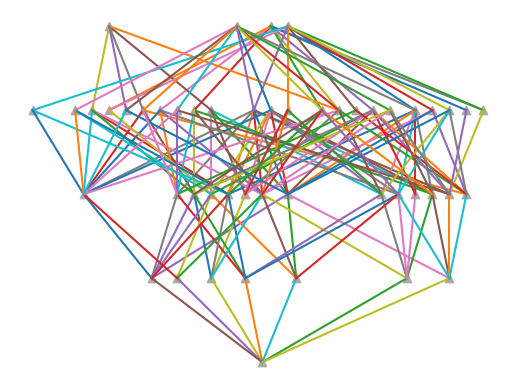

In [29]:

plt.scatter(np.array(x_data), np.array(y_data), marker='^', c='#AAAAAA')
for a,b,c,d in zip(source_x, target_x,  source_y, target_y):
    plt.plot([a,b], [c,d])
plt.axis('off')
plt.savefig(os.path.join(path, "grandalf_sugiyama2.png"), bbox_inches='tight')

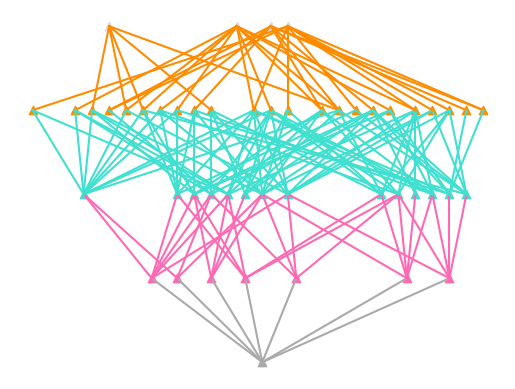

In [30]:
color_map = ['#AAAAAA', '#FF69B4', '#40E0D0', '#FF8C00', '#DDDDDD']

plt.figure()

for l, c in zip(sug.layers, color_map):
    for n in l: plt.scatter(np.array(n.view.xy[0]), np.array(n.view.xy[1]), marker='^', c=c) # (n.view.xy,end='')
    print('')

for a,b,c,d in zip(source_x, target_x,  source_y, target_y):
    plt.plot([a,b], [c,d], c=color_map[layer.index([c]) ] )

plt.axis('off')
plt.savefig(os.path.join(path, "grandalf_sugiyama_3.png"), bbox_inches='tight')    

In [31]:
sug.ctrls.items()

dict_items([])

## run networkx: layout for each layer
* https://stackoverflow.com/questions/57378631/modifying-a-multilayer-network-plot-in-pymnet

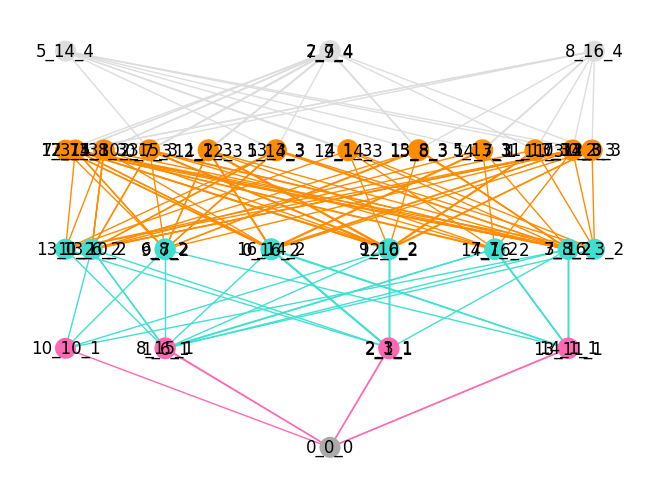

In [32]:
import networkx as nx
import itertools

# node ranges in the graph
# ranges = [(0, 6), (6, 15), (15, 20)] # , (20, 30)]


def draw_graph(graph, layers, size, pos_mode):
    
    nodes = graph.nodes()
    
    color_map = {'entry':'#AAAAAA', 'decent1':'#FF69B4', 'decent2':'#40E0D0', 'decent3':'#FF8C00', 'decent1x1':'#DDDDDD'}
    
    node_color = [color_map[d['group']] for _,d in graph.nodes(data=True)]
    edge_color = [color_map[d['group']] for _,_,d in graph.edges(data=True)]
    node_size = [d['nodesize']*2 for n,d in graph.nodes(data=True)]
    
    
    # Calculate and move the nodes position
    all_pos = {}
    for layer, (m, l), color, name in layers:
        
        # move in m/n direction
        pos = get_nx_layout(pos_mode=pos_mode, graph=layer)

        # move in l (layer) direction
        # pos = nx.kamada_kawai_layout(layer, scale=2)  # kamada_kawai_layout, circular_layout or spring_layout...
        for node in pos:
            all_pos[node] = pos[node]
            all_pos[node] += (m, 200*l)

    import matplotlib.pyplot as plt
    
    # Draw and display the graph    
    nx.draw(graph, all_pos, node_size=node_size, node_color=node_color, with_labels=True, edge_color=edge_color)
    plt.show()
    
pos_mode = 5
draw_graph(graph=nx_G, layers=nx_layer_list, size=(100,100), pos_mode=pos_mode)

## run networkx: layout for whole network
* https://www.kaggle.com/code/mayeesha/network-analysis-for-dummies-stackoverflow-data

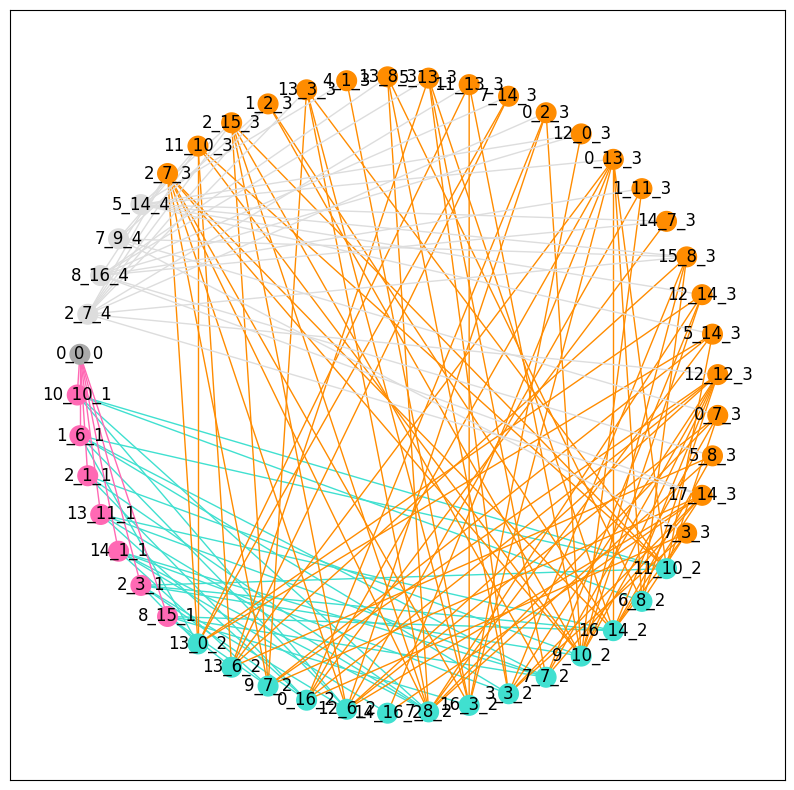

In [33]:
def draw_graph(graph, size, pos_mode):
    
    # G.add_node('m_n_l', group="entry", nodesize=100)
    
    
    nodes = graph.nodes()
    color_map = {'entry':'#AAAAAA', 'decent1':'#FF69B4', 'decent2':'#40E0D0', 'decent3':'#FF8C00', 'decent1x1':'#DDDDDD'}   
    node_color= [color_map[d['group']] for _,d in graph.nodes(data=True)]
    edge_color= [color_map[d['group']] for _,_,d in graph.edges(data=True)]
    
    # print(edge_color)
    
    node_size = [d['nodesize']*2 for n,d in graph.nodes(data=True)]
    
    
    
    # algorithm for position
    pos = get_nx_layout(pos_mode, graph)


    plt.figure(figsize=size)
    nx.draw_networkx(graph, pos=pos, node_color=node_color, node_size=node_size, edge_color=edge_color) # ,edge_width=1)
    plt.show()

pos_mode = 3
draw_graph(graph=nx_G, size=(10,10), pos_mode=pos_mode)

# Metrics

In [34]:
graphpath = os.path.join(path, 'graphviz_dot_sugiyama')

input_file_name = os.path.basename(graphpath)
graph_name = input_file_name.split(".")[0]
G = nx.drawing.nx_agraph.read_dot(graphpath)


print('is_directed', nx.is_directed(G))
print('is_strongly_connected', nx.is_strongly_connected(G))
print('is_weakly_connected', nx.is_weakly_connected(G))
print('is_attracting_component', nx.is_attracting_component(G))
print('is_semiconnected', nx.is_semiconnected(G))
    
if False:
    print(nx.is_directed(G))

    G = nx.DiGraph(G)

    print(nx.is_directed(G))

#largest_cc = max(nx.strongly_connected_components(G), key=len)

#print(largest_cc)

#G = G.subgraph(largest_cc)


#largest_cc = max(nx.connected_components(G), key=len)

#G = G.subgraph(largest_cc)

# G = dot

# Remove Multiple Edges



#print('edge connectivity', nx.edge_connectivity(G))

#print('node_connectivity', nx.node_connectivity(G))

# print(nx.build_auxiliary_node_connectivity(G))

is_directed True
is_strongly_connected False
is_weakly_connected True
is_attracting_component False
is_semiconnected False


In [35]:
nx.density(G)

0.06675170068027211

In [36]:
 #  '2_7_4', '7_9_4')

In [37]:
# implemented for directed type

print("flow hierarchy", nx.flow_hierarchy(G))

print('average node connectivity', nx.average_node_connectivity(G))

# Return a list of the frequency of each degree value.
print('degree histogram', nx.degree_histogram(G))

print('density', nx.density(G))

flow hierarchy 1.0
average node connectivity 0.3137755102040816
degree histogram [0, 0, 1, 5, 6, 9, 5, 6, 7, 5, 2, 1, 2]
density 0.06675170068027211


In [38]:
# not implemented for directed type
if False:
    print(nx.maximal_independent_set(G))
    print(nx.rich_club_coefficient(G))
    print(nx.is_distance_regular(G))
    print(nx.is_connected(G))
    nx.number_connected_components(G)
    nx.is_biconnected(G)
    nx.common_neighbors(uG, 0, 1)
    
# Input graph MultiDiGraph named 'Sugiyama' with 61 nodes and 158 edges is disconnected, so every induced subgraph has infinite barycentricity.
if False:
    nx.barycenter(G)

## Graph Polynomials

In [39]:
if False:
    import sympy
    x = sympy.Symbol("x")
    G = nx.complete_graph(4)
    A = nx.adjacency_matrix(G)
    M = sympy.SparseMatrix(A.todense())
    M.charpoly(x).as_expr()

In [40]:
G

# ********* Testing random nonsense that doesn't work **********

## Metaheuristic: Tabu

### Simple short term tabu search

In [41]:
max_iter = 100
x_best = 0
for in in range(max_iter):
    compute_candidate_list() # CL
    compute_neighbourhood() # N
    select_best_solution()
    x = perform_move()
    if x > x_best:
        x_best = x
    update_tabu_status
    
    

SyntaxError: invalid syntax (1256971858.py, line 3)

### Tabu
* https://github.com/edgarsmdn/TS/tree/master

## Multilayer Networks Library for Python (Pymnet)


In [ ]:
fig = draw(grandalf_G, layout="spring")

In [ ]:
from pymnet import *
mnet = MultilayerNetwork(aspects=2)


mnet.add_layer('a', 10)
mnet.add_layer('b', 11)
mnet.add_layer('c', 12)
mnet.add_layer('d', 13)

mnet.add_node(1)
#mnet.add_node(2)
#mnet.add_node(3)
#mnet.add_node(4)



# mnet[1,'a','b'][2,'c','d']

# print("access node with node and layer:", mnet[1,'a'].deg())


# mnet[mnet2 = MultilayerNetwork(aspects=2)

#mnet2[1,2,'a','b','x','y']=1

#mnet2[1,'a','x'][2,'b','y']1,2,'a','b']




In [ ]:
mnet = MultilayerNetwork(aspects=1)

mnet.add_node(1)
mnet.add_layer('a')

mnet.add_node(2)
mnet.add_layer('b')

mnet[1,'a'][2,'b'] = 1

'''
mnet2[1,2,'a','b','x','y']=1

mnet2[1,'a','x'][2,'b','y']

print(mnet2)
'''
#mnet2.add_layer('c',1)

#mnet2.add_layer('z',2)

fig = draw(mnet, layout="spring")

In [ ]:
cnet = MultiplexNetwork(couplings=('categorical',10))


cnet.add_layer('a', 1)

cnet.add_layer('b', 1)

cnet.add_node(1, layer='a')

cnet.add_node(2, layer='b')



#cnet[1,2,'a','b']


a = draw(cnet, layout='spring')

n=net.MultilayerNetwork(aspects=1)


n.add_layer(1)
n.add_layer(2)
n.add_node(4,layer=1)
n.add_node(5,layer=1)
n.add_node(6,layer=2)
n.add_node(7,layer=2)
#n[4,7,1]=1
#n[7,8,3]=1

a = draw(n, layout="spring")

In [ ]:
testnet=net.MultilayerNetwork(aspects=1)
testnet[1,1,'a','b']=1
testnet[2,2,'a','b']=1
testnet[3,3,'a','b']=1
testnet[1,1,'a','c']=0
testnet[2,2,'a','c']=0
testnet[3,3,'a','c']=0
testnet[1,1,'b','c']=1
testnet[2,2,'b','c']=1
testnet[3,3,'b','c']=1
        
draw(testnet, layout='spring')

In [ ]:
import numpy as np
import random as rnd

import numpy as np
import random as rnd
'''

               Utilities for Stochastic Optimization Algorithms

'''
def LS_f_v3(f, p_init, max_iter, bounds, radius, reduce_iter, reduce_frac):
    '''
    ---------------------
    LOCAL SEARCH ALGORITHM
    ---------------------
    --- input ---
    f: (function) Objective function
    p_init: (array) Initial point (where the funtion is going to be evaluated)
    max_iter: (integer) Maximum number of iterations
    bounds: (list) Bounds on the search domain
    radius: (float) Initial search radius
    reduce_iter: (integer) Number of iterations with the same optimum that will induce a search radius reduction
    reduce_frac: (float) Fraction to which the search radius is reduced. Must be between 0 and 1

    --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated

    --- Notes ---
    1. f stands for "fast implementation" which means it does not compile results
    '''
    #Initialization
    f = f
    p_init = p_init
    max_iter = max_iter
    bounds = bounds
    radius = radius
    reduce_iter = reduce_iter
    reduce_frac = reduce_frac
    # ----------------------------------------------
    best_position = p_init
    best_value = f(p_init)
    dim = len(p_init)
    fail_count = 0   
    # Iteration Loop
    for i_iter in range(max_iter):
        # Tries random values in the vecinity of the best position so far
        # Assure that every variable is within the bounds
        check = False
        while not check:
            temp_bound = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
            p_trial = - best_position + radius * temp_bound
            check = check_bounds(bounds, p_trial)
            if not check:
                p_trial = best_position - radius * temp_bound
                check = check_bounds(bounds, p_trial)
            # If the modification of the complete set did not work. It will modify each variable individually
            if not check:
                p_trial = check_bounds_variable(bounds, p_trial, radius)
                check = True
        # If trial value is better than best value, this gets substituted
        trial_value = f(p_trial)
        if trial_value < best_value:
            best_position = p_trial
            best_value  = trial_value
        else:
            fail_count += 1
        # Check whether it's time to set radius to smaller one. Resets failcount
        if fail_count == reduce_iter:
            radius *= reduce_frac
            fail_count = 0
    return best_value, best_position

def LS_p_v3(f, p_init, max_iter, bounds, radius, reduce_iter, reduce_frac):
    '''
    ---------------------
    LOCAL SEARCH ALGORITHM
    ---------------------
    --- input ---
    f: (function) Objective function
    p_init: (array) Initial point (where the funtion is going to be evaluated)
    max_iter: (integer) Maximum number of iterations
    bounds: (list) Bounds on the search domain
    radius: (float) Initial search radius
    reduce_iter: (integer) Number of iterations with the same optimum that will induce a search radius reduction
    reduce_frac: (float) Fraction to which the search radius is reduced. Must be between 0 and 1

    --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated
    trajectory: (matrix) Column 0: Number of iteration. Column 1: Value for current iteration
    trajectory_x: (matrix) Positions visited during the iterations

    --- Notes ---
    1. The "p" states for the "plot" version of the algorithm. It outputs all the iteration trajectory
    '''
    #Initialization
    f = f
    p_init = p_init
    max_iter = max_iter
    bounds = bounds
    radius = radius
    reduce_iter = reduce_iter
    reduce_frac = reduce_frac
    # ----------------------------------------------
    best_position = p_init
    best_value = f(p_init)
    dim = len(p_init)
    fail_count = 0
    
    trajectory       = np.zeros((max_iter + 1, 2))
    trajectory[0][0] = 0
    trajectory[0][1] = best_value
    
    trajectory_x    = np.zeros((max_iter + 1, dim))
    trajectory_x[0] = best_position
    
    # Iteration Loop
    for i_iter in range(max_iter):
        # Tries random values in the vecinity of the best position so far
        # Assure that every variable is within the bounds
        check = False
        while not check:
            temp_bound = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
            p_trial = - best_position + radius * temp_bound
            check = check_bounds(bounds, p_trial)
            if not check:
                p_trial = best_position - radius * temp_bound
                check = check_bounds(bounds, p_trial)
            # If the modification of the complete set did not work. It will modify each variable individually
            if not check:
                p_trial = check_bounds_variable(bounds, p_trial, radius)
                check = True
        # If trial value is better than best value, this gets substituted
        trial_value = f(p_trial)
        if trial_value < best_value:
            best_position = p_trial
            best_value  = trial_value
        else:
            fail_count += 1
        # Check whether it's time to set radius to smaller one. Resets failcount
        if fail_count == reduce_iter:
            radius *= reduce_frac
            fail_count = 0
        # Stores trajectory
        trajectory[i_iter + 1][0] = i_iter + 1
        trajectory[i_iter + 1][1] = best_value
        trajectory_x[i_iter + 1]  = best_position
        
        
    return best_value, best_position, trajectory, trajectory_x

def RS_f_v2(f, p_best, max_iter, bounds):
    '''
    ---------------------
    RANDOM SEARCH ALGORITHM
    ---------------------
    --- input ---
    f: objective function
    p_best: hot-start a best point
    max_iter: maximum number of iterations
    bounds: bounds on the search domain
    
    --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated

    --- Notes ---
    1. p_best is used in case a good value is already known
    2. The "f" states for the "fast" version of the algorithm. It only outputs the best values found
    '''
    # Initialization
    f = f
    p_best = p_best
    max_iter = max_iter
    bounds = bounds
    # ----------------------------------------------
    best_position = p_best
    best_value = f(p_best)
    dim = len(p_best)
    # Search loop
    for i_iter in range(max_iter):
        # Tries random values
        p_trial = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
        trial_value = f(p_trial)
        # If trial values is better than best position, this gets substituted
        if trial_value < best_value:
            best_position = p_trial
            best_value  = trial_value
    return best_value, best_position

def RS_p_v2(f, p_best, max_iter, bounds):
    '''
    ---------------------
    RANDOM SEARCH ALGORTHM
    ---------------------
    --- input ---
    f: objective function
    p_best: hot-start a best point
    max_iter: maximum number of iterations
    bounds: bounds on the search domain

     --- output ---
    best_value: (float) The best value found with the iteration using the best_position
    best_position: (array) The best position in which the final best_value was evaluated
    trajectory: (matrix) Column 0: Number of iteration. Column 1: Value for current iteration
    
    --- Notes ---

    1. p_best is used in case a good value is already known.
    2. The "p" states for the "plot" version of the algorithm. It outputs all the iteration trajectory

    '''
    # Initialization
    f = f
    p_best = p_best
    max_iter = max_iter
    bounds = bounds
    # ----------------------------------------------
    best_position = p_best
    best_value = f(p_best)
    dim = len(p_best)
    # Creating arrays for the plots
    all_results = np.zeros((max_iter,2))
    # Search loop
    for i_iter in range(max_iter):
        # Tries random values 
        p_trial = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
        trial_value = f(p_trial)
        # If trial values is better than best position, this gets substituted
        if trial_value < best_value:
            best_position = np.copy(p_trial)
            best_value  = trial_value
        # Compiling results
        all_results[i_iter][0] = i_iter
        all_results[i_iter][1] = best_value
    return best_value, best_position, all_results

def check_bounds_variable(bounds, position, radius):
    '''
    ------------------------------
    CHECK BOUNDS VARIABLE BY VARIABLE AND ASSURES THEY ARE WITHIN BOUNDS CHANGING THEM WHEN NECESSARY
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
    position: (array) Proposed current position of the particle
    
    --- output ---
    position: (array) Corrected array to be within bounds in each variable
    '''
    # Initialization
    bounds = bounds
    position = position
    radius = radius
    # ----------------------------------------------
    check = False
    while not check:
        check_var_count = 0 #To count variables which are within bounds
        for variable in range(len(position)):
            bounds_variable = [bounds[variable]] # Extracts the bounds for the specific variable
            check_variable = check_bounds(bounds_variable, np.array([position[variable]]))
            if not check_variable:
                r1 = variable - radius # Left limit radius 
                r2 = variable + radius # Right limit radius 
                
                if r2 < bounds_variable[0][0]:                                  # O /------/
                    position[variable] = bounds_variable[0][0]
                elif r1 > bounds_variable[0][1]:                                # /------/ O
                    position[variable] = bounds_variable[0][1]
                elif r2 > bounds_variable[0][0] and r1 < bounds_variable[0][0]: # O----/
                    position[variable] = rnd.uniform(bounds_variable[0][0], r2)
                elif r1 < bounds_variable[0][1] and r2 > bounds_variable[0][1]: # /----O
                    position[variable] = rnd.uniform(r1, bounds_variable[0][1])
                elif r1 > bounds_variable[0][0] and r2 < bounds_variable[0][1]: # /--O--/
                    position[variable] = rnd.uniform(r1, r2)
                
                check_variable = check_bounds(bounds_variable, np.array([position[variable]]))
            if check_variable:
                check_var_count += 1
        if check_var_count == len(position):
            check = True
    if check:
        return position

def check_bounds(bounds, position):
    '''
    ------------------------------
    CHECK BOUNDS ALGORITM
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
    position: (array) Proposed current position of the particle
    
    --- output ---
    valid_position: (boolean) "True" if position is within the allowed bounds in every dimension and "False" otherwise
    '''
    # Initialization
    bounds = bounds
    position = position
    # ----------------------------------------------
    dim = len(bounds)
    count = 0
    for i in range(dim):
        if position[i] <= bounds[i][1] and position[i] >= bounds[i][0]:
            count += 1
    if count == dim:
        return True
    else:
        return False

def tabu_zone(tabu, continuos_radius):
    '''
    ------------------------------
    DEFINES TABU ZONE FOR EACH VARIABLE IN A POINT GIVEN A CONTINUOS RADIUS
    ------------------------------
    --- input ---
    tabu: (array) Point classified as Tabu
    continuos_radius: (list) Radius around each variable to define tabu zone for each variable in the tabu point
   
    --- output ---
    tabu_z: (list) It contains the tabu zone per each variable of the point
    '''
    # Initialization
    tabu = tabu
    continuos_radius
    # ----------------------------------------------
    tabu_z = [] # To store tabu zones for each variable
    # Defines tabu zone per each variable
    for i in range(len(tabu)):
        left = tabu[i] - continuos_radius[i] # Defines left bound of the tabu zone
        right = tabu[i] + continuos_radius[i] # Defines right bound of the tabu zone
        tabu_z.append((left, right))
    return tabu_z

def tabu_zones(tabuList, continuos_radius):
    '''
    ------------------------------
    GIVES TABU ZONES FOR EACH TABU IN THE LIST
    ------------------------------
    --- input ---
    tabuList: (list) Stores all the current tabu points
    continuos_radius: (list) Radius around each variable to define tabu zone for each variable in the tabu point
   
    --- output ---
    tabu_zs: (list) It contains the tabu zones per each tabu point
    '''
    # Initialization 
    tabuList = tabuList
    continuos_radius = continuos_radius
    # ----------------------------------------------
    tabu_zs = []
    for tabu in tabuList:
        t_z = tabu_zone(tabu, continuos_radius)
        tabu_zs.append(t_z)
    return tabu_zs

def check_tabu(position, tabu_zs):
    '''
    ------------------------------
    CHECKS IF A POINT IS A TABU OR NOT
    ------------------------------
    --- input ---
    position: (array) Position within the search space
    tabu_zs: (list) It contains the tabu zones per each tabu point
   
    --- output ---
    tabu: (boolean) "True" if position is a tabu (it's within the tabu zone in each one of its variables) and "False" otherwise
    '''
    # Initialization
    position = position
    tabu_zs = tabu_zs
    # ----------------------------------------------
    for tabu_z in tabu_zs:
        check = check_bounds(tabu_z, position) # Checks if the position is within a tabu zone
        if check:
            return True
    if not check:
        return False

def p_outside_tabu(bounds, tabu_zs):
    '''
    ------------------------------
    GENENRATES A POSITION OUTSIDE TABU ZONES
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
    tabu_zs: (list) It contains the tabu zones per each tabu point
   
    --- output ---
    p_out_tabu: (array) Random particle outside tabu zones and within bounds
    '''
    # Initialization
    bounds = bounds
    tabu_zs = tabu_zs
    # ----------------------------------------------
    p_out_tabu = np.zeros(len(bounds)) # Creates an array of zeros to store new position
    
    check = True
    while check:
        select_tabu_z = rnd.choice(tabu_zs) # Selects randomnly one of the sets of tabu zones
        for i in range(len(bounds)):
            # Selects valid limits
            if select_tabu_z[i][0] > bounds[i][0] and select_tabu_z[i][1] < bounds[i][1]:    # /--O--/
                left1 = bounds[i][0]
                right1 = select_tabu_z[i][0]
                left2 = select_tabu_z[i][1]
                right2 = bounds[i][1]
            elif select_tabu_z[i][0] > bounds[i][0] and select_tabu_z[i][1] >= bounds[i][1]:  # /----O
                left1 = bounds[i][0]
                right1 = select_tabu_z[i][0]
                left2 = left1
                right2 = right1
            elif select_tabu_z[i][0] <= bounds[i][0] and select_tabu_z[i][1] < bounds[i][1]:  # O----/
                left1 = select_tabu_z[i][1]
                right1 = bounds[i][1]
                left2 = left1
                right2 = right1
            new_bounds = rnd.choice(((left1, right1),(left2, right2)))
            p_out_tabu[i] = rnd.uniform(new_bounds[0], new_bounds[1])
        check = check_tabu(p_out_tabu, tabu_zs) # Checks whether the new position is a tabu or not
    return p_out_tabu
             
def new_particle(bounds):
    '''
    ------------------------------
    GENERATES NEW PARTICLE (POINT) RANDOMLY
    ------------------------------
    --- input ---
    bounds: (list) Bounds on the search domain
   
    --- output ---
    particle: (array) Random particle within bounds
    '''
    #Initialization
    B = bounds
    # ----------------------------------------------
    dim = len(B)
    #Generate new random particle within the bounds
    particle = np.array([rnd.uniform(B[i][0],B[i][1]) for i in range(dim)])
    return particle

def first_generation(num_p, bounds):
    '''
    ------------------------------
    GENERATES FIRST GENERATION FOR GA
    ------------------------------
    --- input ---
    num_p: (integer) Number of particles in the new generation to be created
    bounds: (list) Bounds on the search domain
    
    --- output ---
    generation: (list) Set of new particles
    '''
    # Initialization
    S = num_p
    B = bounds
    # ----------------------------------------------
    generation = []
    # Generates a set of num_p new particles
    for point in range(S):
        particle = new_particle(B)
        generation.append(particle)
    return generation

def sort_standard(f, generation):
    '''
    ------------------------------
    STANDARD SORT (WALKS THROUGH EACH ELEMENT IN LIST)
    ------------------------------
    --- input ---
    f: (function) Objetive function
    generation: (list) Set of new particles
    
    --- output ---
    g_sorted: (matrix) Sorted set of new particles. Row: particle, Column: variable
    '''
    # Initialization
    F = f
    G = generation
    # ----------------------------------------------
    dim = len(G)
    num_var = len(G[0])
    g_sorted = np.reshape([(0.0) for i in range(num_var*dim)], (dim,num_var)) # Creates a matrix of zeros
    values = np.zeros((dim,2)) # Creates a matrix of zeros
    # Stores the points with their respective value(as a key)
    index = 0
    for particle in G:
        values[index][0] = F(particle)
        values[index][1] = index
        index += 1
    # Sorts values
    values_sorted = values[np.argsort(values[:,0])]
    # Stores sorted values in the previously created matrix
    ind_sorted = values_sorted[:,1]
    i = 0
    for ind in ind_sorted:
        g_sorted[i] = G[int(ind)]
        i += 1
    return g_sorted

def selection(g_sorted, best_num, random_num):
    '''
    ------------------------------
    SELECTION OF THE FITTEST POINTS AND SOME RANDOME ONES
    ------------------------------
    --- input ---
    g_sorted: (matrix) Sorted set of new particles. Row: particle, Column: variable.
    best_num: (integer) Number of best particles you want to select
    random_num: (integer) Number of random particles you want to select from the rest
    
    --- output ---
    selected: (matrix) Set of particles selected
    '''
    #Initialization
    g = g_sorted
    best = best_num
    random = random_num
    # ----------------------------------------------
    num_var = len(g[0])
    selected = np.reshape([(0.0) for i in range(num_var*(best + random))], ((best + random),num_var)) # Creates a matrix of zeros
    # Stores the best points to the matrix "selected"
    for i in range(best):
        selected[i] = g[i]
    # Stores points from the rest of the generation randomly  
    for i in range(random):
        selected[i + best] = rnd.choice(g[best:])
    return selected

def define_parents(selected, parents_child):
    '''
    ------------------------------
    SELECTION OF POINTS WHICH ARE GONNA BE RECOMBINED AMONG THEM
    ------------------------------
    --- input ---
    selected: (matrix) Set of particles selected
    parents_child: (integer) Number of parents per child
   
    --- output ---
    groups_par: (list) Set of groups of parents that are gonna be recombined
    '''
    # Initialization
    parents = selected
    N = parents_child
    # ----------------------------------------------
    groups_par = []
    # Loop to define parents
    row_parent = 0 # Number of the row in the Matrix for the current parent in the next loop
    for parent in parents:
        group_repro = np.zeros((N,len(parent))) # Creates a matrix of zeros
        # Makes a matrix of the candidates to be reproduced with
        candidates = np.delete(parents, row_parent, 0)
        # Randomly select the parents from candidates to be later reproduce with.
        for i in range (N-1):
            cand = rnd.choice(candidates)
            group_repro[i] = parent
            group_repro[i+1] = cand
            index_row = np.where([cand] == [cand])[0][0] # Gives de row number of "cand"
            candidates = np.delete(candidates, index_row, 0) # Prevent repetition within the group of parents
        groups_par.append(group_repro)
        row_parent += 1
    return groups_par
    
def reproduction(groups_par, num_children):
    '''
    ------------------------------
    REPRODUCTION OF PARENTS BY RANDOM RECOMBINATION
    ------------------------------
    --- input ---
    groups_par: (list) Set of groups of parents that are gonna be recombined
    num_children: (integer) Number of children per group of parents
    
    --- output ---
    new_gener_r: (matrix) Set of children (points) produced by recombination of the groups of parents
    '''
    # Initialization
    groups = groups_par
    num_ch = num_children
    # ----------------------------------------------
    new_gener = []
    num_ac_child = 0 #Number of current children per group of parents 
    # Produces the number of children specified per group of parents
    while num_ac_child < num_ch:
        # Loops per group of parents
        for group in groups:
            child = []
            #Loops per each variable in a point 
            for variable in range(len(group[0])):
                can_var = []
                # Selects the variable randomly between the group of parents
                for i in range(len(group)):
                    can_var.append(group[i][variable])
                child.append(rnd.choice(can_var))
            new_gener.append(child)
        num_ac_child += 1
    new_gener_r = np.asarray(new_gener)
    return new_gener_r

def mutation(new_gener_r, bounds, continuos_radius):
    '''
    ------------------------------
    MUTATION OF NEW CHILDREN WITH CERTAIN PROBABILITY
    ------------------------------
    --- input ---
    new_gener_r: (matrix) Set of children (points) produced by recombination of the groups of parents
    bounds: (list) Bounds on the search domain
    continuos_radius: (list) Radius around each variable to define prohibeted zone for each variable. Continuos numbers application
    
    --- output ---
    g_m: (matrix) Set of children (points) passed through random mutation with certain probability
    '''
    #Initialization
    g_r = new_gener_r
    B = bounds
    c_r = continuos_radius
    # ----------------------------------------------
    num_var = len(g_r[0])
    # Makes a random change in a random variable per child with certain probability of mutation
    i = 0
    for child in g_r:
        probability = 1/num_var # 1/num of decision variables according to Deb,K. (2001), Multi-Objective Optimization Using Evolutionary Algorithms
        if child in np.delete(g_r, i): # Prevents a child to be exactly the same as one of its parents
            probability = 1
        if rnd.random() < probability:
            random_index = np.where( child == (rnd.choice(child)))[0][0]
            c_r_v = [c_r[random_index]] # Selects the continuos radius to the chosen variable to be mutated and store it as need it for "tabu_zones"
            var_mut = [np.array([child[random_index]])] # Selects the chosen variable to be mutated and store it as need it for "tabu_zones"
            proh_zone = tabu_zones(var_mut, c_r_v) # Defines the zone within the continuos radius
            bounds_var = [B[random_index]] # Selects the bounds for the chosen variable to be mutated
            mutated_variable = p_outside_tabu(bounds_var, proh_zone) # Gives a random number for the chosen variable outside continuos radius and within bounds
            child[random_index] = mutated_variable # Replaces the mutated variable in place
            #child[random_index] = rnd.uniform(B[random_index][0],B[random_index][1])
        i += 1
    new_gener_m = g_r
    return new_gener_m

def TS(f, max_iter, max_iter_LS, bounds, radius, reduce_iter, reduce_frac, max_tabu_size, continuos_radius, p_init=None, traj=False):
    '''
    ------------------------------
    TABU SEARCH ALGORITHM
    ------------------------------
    --- input ---
    f: (function) Objetive function
    max_iter: (integer) maximum number of iterations for Tabu Search
    max_iter_LS: (integer) maximum number of iterations for subroutine "Local Search (LS)"
    bounds: (list) bounds on the search domain
    radius: (float) initial search radius for Local Search
    reduce_iter: (integer) number of iterations with the same optimum that will induce a search radius reduction in LS
    reduce_frac: (float) fraction to which the search radius is reduced in LS
    max_tabu_size: (integer) Maximum number of points stock in the memory for Tabu Search
    continuos_radius: (list) This radius will categorize as Tabu a point within the zone between this radius and the current position
    p_init: (array) Initial point for the funtion to be firstly evaluated. If not given, it will generates one randomly
    traj: (boolean) To output trajectory or not. Default is false
    
    --- output ---
    Optimum: (class) Results with:
        Optimum.f: (float) The best value of the funtion found in the optimization
        Optimum.x: (array) The best point in which the function was evaluated
        Optimum.traj_f: (array) Trajectory of function values (including LS iterations)
        Optimum.traj_x: (array) Trajectory of positions (including LS iterations)
        Optimum.traj_f_sum_up: (array) Trajectory of function values (including TS steps only). 
                                        First column is number of total iterations.
        Optimum.traj_x_sum_up: (array) Trajectory of positions (including TS steps only)
    '''
    # Initialize
    dim = len(bounds)
    # Generates a random p_init if not given
    if np.any(p_init) == None:
        p_init = np.array([rnd.uniform(bounds[i][0],bounds[i][1]) for i in range(dim)])
    
    sBest           = p_init
    bestCandidate   = p_init
    iteration       = 0
    tabuList        = []
    tabuList.append(bestCandidate)
     
    if traj:
        # To store summed up of trajectory
        trajectory_sum_up       = np.zeros((max_iter + 1, 2))
        trajectory_sum_up[0][0] = 0
        trajectory_sum_up[0][1] = f(sBest)
        traj_x_sum_up           = np.zeros((max_iter + 1, dim))
        traj_x_sum_up[0]        = sBest
        
        # To store complete trajectory
        trajectory       = np.zeros(max_iter * (max_iter_LS + 1)+ 1) 
        trajectory[0]    = f(sBest)
        traj_x           = np.zeros((max_iter * (max_iter_LS + 1)+ 1, dim))
        traj_x[0]        = sBest
    
        beginning = 1 # Helps to store complete trajectory properly
    
    # Iteration Loop
    while iteration < max_iter:        
        list_dim = len(tabuList)
        # Checks if bestCandidate is within bounds, if not, it will give a point within them
        bestCandidate = check_bounds_variable(bounds, bestCandidate, radius)
        # Check if the Candidate is a Tabu or not
        tabu_zs = tabu_zones(tabuList, continuos_radius) # Defines tabu zones based on the tabu list and continuos radius
        Tabu    = check_tabu(bestCandidate, tabu_zs)
        # Decide what to do if the Candidate is a Tabu
        if Tabu: # If Tabu, it assigns another random neighbour value of the current bestCandidate
            bestCandidate = p_outside_tabu(bounds, tabu_zs) # Generates a point outside the tabu zones and within bounds
            local_search  = LS_p_v3(f, bestCandidate, max_iter_LS, bounds, radius, reduce_iter, reduce_frac) # Searches the local minimum around bestCandidate
            bestCandidate = local_search[1]
            tabuList.append(bestCandidate)
        else: # If not Tabu, it makes the local search around this point to try to reach the local minimum
            local_search  = LS_p_v3(f, bestCandidate, max_iter_LS, bounds, radius, reduce_iter, reduce_frac)
            bestCandidate = local_search[1]
            tabuList.append(bestCandidate)
        # Updates information
        if f(bestCandidate) < f(sBest):
            sBest = bestCandidate
        # Checks whether is time to updates the Tabu list
        if list_dim > max_tabu_size:
            tabuList = tabuList[1:]
        iteration += 1
        
        if traj:
            # Stores complete trajectory
            trajectory[beginning:(iteration*(max_iter_LS + 1) + 1)] = local_search[2][:,1] # Copies the results from LS in trajectory
            traj_x[beginning:(iteration*(max_iter_LS + 1) + 1)]     = local_search[3]
            
            # Replace last value with the result of TS
            trajectory[iteration*(max_iter_LS + 1)] = f(sBest)
            traj_x[iteration*(max_iter_LS + 1)]     = sBest
            
            beginning = ((iteration)*(max_iter_LS + 1) + 1 )
            
            # Stores summed up trajectory
            trajectory_sum_up[iteration][0] = ((iteration)*(max_iter_LS + 1))
            trajectory_sum_up[iteration][1] = f(sBest)
            traj_x_sum_up[iteration]        = sBest
    
    # Gather results
    class Optimum:
        pass    
    
    if traj:
        Optimum.f                = f(sBest)
        Optimum.x                = sBest
        Optimum.traj_f           = trajectory
        Optimum.traj_x           = traj_x
        Optimum.traj_f_sum_up    = trajectory_sum_up
        Optimum.traj_x_sum_up    = traj_x_sum_up
        
    else:
        Optimum.f                = f(sBest)
        Optimum.x                = sBest
        
    return Optimum

In [ ]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

'''

                              Example of TS 

'''

def alpine1(variables):
    '''
    Alpine 1 function
    Minimum at 0 at x = [zeros]
    Usually domain of evaluation is [-10, 10]
    Source: http://infinity77.net/global_optimization/test_functions_nd_A.html#n-d-test-functions-a
    Retrieved: 19/06/2018
    '''
    return np.sum(np.abs(np.multiply(variables, np.sin(variables)) + 0.1 * variables))

f = alpine1
b = (-10, 10)

max_iter = 10
max_iter_LS = 5
bounds=[b for i in range(2)]
radius = 0.5
reduce_iter = 100
reduce_frac = 0.8
max_tabu_size = 20
continuos_radius = [(0.01) for i in range(len(bounds))]


results = TS(f, max_iter, max_iter_LS, bounds, radius, reduce_iter, 
             reduce_frac, max_tabu_size, continuos_radius, p_init=None, traj=True)


#print('Best function value: ', results.f)
#print(' ')
#print('Best point: ', results.x)
#print(' ')
#print('Trajectory function values: ', results.traj_f)
#print(' ')
#print('Trajectory points: ', results.traj_x)
#print(' ')
#print('Trajectory function values summed up: ', results.traj_f_sum_up)
#print(' ')
#print('Trajectory points summed up: ', results.traj_x_sum_up)


# Plot Optimization
points             = np.zeros(1, dtype=[("position", float, 2)])
points["position"] = results.traj_x[0]

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.15, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
start, stop, n_values = b[0], b[1], 100

x       = np.linspace(start, stop, n_values)
y       = np.linspace(start, stop, n_values)
X, Y    = np.meshgrid(x, y)

zs = np.array([f(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z  = zs.reshape(X.shape)

cm = plt.contourf(X, Y, Z, cmap='Blues')
plt.colorbar(cm)
ax.set_title('Alpine 1 function')
ax.set_xlabel('x')
ax.set_ylabel('y')

scatter = ax.scatter(points["position"][:,0], points["position"][:,1], c='red', s=50)

xs = results.traj_x

def update(frame_number):
    points["position"] = xs[frame_number]
    ax.set_title('Alpine 1 function, Iteration: ' + str(frame_number))
    scatter.set_offsets(points["position"])
    return scatter, 

anim = FuncAnimation(fig, update, interval=0.1, frames=range(len(xs)), repeat_delay=2000)
plt.show()

# Save gif
anim.save('TS.gif', writer='imagemagick', fps=400)

## Metaheuristic (Tabu, GA, SA) for Travelling Salesman Problem (TSP)
* https://github.com/CarlossShi/tsp-meta-heuristic


In [ ]:
def get_cost(n, adj_mat, sol):
    """
    :param n: number of vertices, e.g. 2
    :param adj_mat: adjacency matrix, e.g. [[0,1], [1,0]]
    :param sol: solution, e.g. [1,0]
    """
    return sum([adj_mat[sol[_]][sol[(_ + 1) % n]] for _ in range(n)])


def get_delta_swap(n, adj_mat, sol, i, j):
    # bef: [..., i-1, i, i+1, ..., j-1, j, j+1] / [...,i-1, i, j, j+1, ...]
    # aft: [..., i-1, j, i+1, ..., j-1, i, j+1] / [...,i-1, j, i, j+1, ...]
    # the latter case, 2 * adj_mat(i, j) is extra deducted!
    delta = adj_mat[sol[i - 1]][sol[j]] + adj_mat[sol[j]][sol[(i + 1) % n]] + \
            adj_mat[sol[j - 1]][sol[i]] + adj_mat[sol[i]][sol[(j + 1) % n]] - \
            adj_mat[sol[i - 1]][sol[i]] - adj_mat[sol[i]][sol[(i + 1) % n]] - \
            adj_mat[sol[j - 1]][sol[j]] - adj_mat[sol[j]][sol[(j + 1) % n]]
    if j - i == 1 or i == 0 and j == n - 1:
        delta += 2 * adj_mat[sol[i]][sol[j]]  # symmetrical TSP
    return delta


def get_new_sol_swap(sol, i, j):
    new_sol = sol.copy()
    new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
    return new_sol


def get_delta_2opt(n, adj_mat, sol, i, j):
    # bef: [..., i-1, i, i+1, ..., j-1, j, j+1] / [...,i-1, i, j, j+1, ...] / [i, i+1, ..., j-1, j]
    # aft: [..., i-1, j, j-1, ..., i+1, i, j+1] / [...,i-1, j, i, j+1, ...] / [j, i+1, ..., j-1, i]
    # the latter case, 2 * adj_mat(i, j) is extra deducted!
    delta = adj_mat[sol[i - 1]][sol[j]] + adj_mat[sol[i]][sol[(j + 1) % n]] - \
            adj_mat[sol[i - 1]][sol[i]] - adj_mat[sol[j]][sol[(j + 1) % n]]
    if i == 0 and j == n - 1:  # the first two value == 0, while others < 0
        delta = 0
    return delta


def get_new_sol_2opt(sol, i, j):
    new_sol = sol.copy()
    new_sol[i:j+1] = new_sol[i:j+1][::-1]  # notice index + 1 !
    return new_sol

In [ ]:
# tb.py
import random
import math
from collections import deque


def tnm_selection(n, adj_mat, sol, max_tnm, mut_md, tb_size, tb_list, fq_dict, best_cost):
    """
    :param n: number of vertices
    :param adj_mat: adjacency matrix
    :param sol: solution where the neighbours are chosen from
    :param max_tnm: how many candidates picked in tournament selection
    :param mut_md: [get_sol, get delta], method of mutation, e.g. swap, 2-opt
    :param tb_size: >=0, max length of tb_list
    :param tb_list: deque ,out <- [...] <- in
    :param fq_dict: visit times of vertex pair (not used!)
    :param best_cost: cost of the best solution
    """

    get_new_sol = mut_md[0]
    get_delta = mut_md[1]

    cost = get_cost(n, adj_mat, sol)

    best_delta_0 = math.inf
    best_i_0 = best_j_0 = -1

    best_delta_1 = math.inf
    best_i_1 = best_j_1 = -1
    for _ in range(max_tnm):
        i, j = random.sample(range(n), 2)  # randomly select two indexes
        i, j = (i, j) if i < j else (j, i)  # let i < j
        v_1, v_2 = (sol[i], sol[j]) if sol[i] < sol[j] else (
            sol[j], sol[i])  # v_1 < v_2 make indexing in tb_list and fq_dict convenient
        delta = get_delta(n, adj_mat, sol, i, j)
        if (v_1, v_2) not in tb_list:  # if not tabu
            if delta < best_delta_0:
                best_delta_0 = delta
                best_i_0 = i
                best_j_0 = j
        else:  # if tabu
            if delta < best_delta_1:
                best_delta_1 = delta
                best_i_1 = i
                best_j_1 = j
    if best_delta_1 < best_delta_0 and cost + best_delta_1 < best_cost:  # break the tabu
        v_1, v_2 = (sol[best_i_1], sol[best_j_1]) if sol[best_i_1] < sol[best_j_1] else (sol[best_j_1], sol[best_i_1])
        tb_list.remove((v_1, v_2))
        tb_list.append((v_1, v_2))  # move to the end of list
        fq_dict[(v_1, v_2)] = fq_dict.get((v_1, v_2), 0) + 1
        new_sol = get_new_sol(sol, best_i_1, best_j_1)
        new_cost = cost + best_delta_1
    else:  # do not break the tabu
        if tb_size > 0:
            v_1, v_2 = (sol[best_i_0], sol[best_j_0]) \
                if sol[best_i_0] < sol[best_j_0] \
                else (sol[best_j_0], sol[best_i_0])
            if len(tb_list) == tb_size:
                tb_list.popleft()
            tb_list.append((v_1, v_2))
            fq_dict[(v_1, v_2)] = fq_dict.get((v_1, v_2), 0) + 1
        new_sol = get_new_sol(sol, best_i_0, best_j_0)
        new_cost = cost + best_delta_0
    # assert abs(new_cost - get_cost(n, adj_mat, new_sol)) < 1e-9, 'new_sol does not match new_cost'
    return new_sol, new_cost, tb_list, fq_dict


def tb(n, adj_mat, tb_size, max_tnm, mut_md, term_count):
    """
    :param n: number of vertices
    :param adj_mat: adjacency matrix
    :param tb_size: tabu solutions in tb_list
    :param max_tnm: how many candidates picked in tournament selection
    :param mut_md: [get_sol, get delta], method of mutation, e.g. swap, 2-opt
    :param term_count: termination flag
    """
    # initialization
    sol = list(range(n))
    random.shuffle(sol)  # e.g. [0,1,...,n]
    tb_list = deque([])
    fq_dict = {}
    best_sol = sol.copy()
    best_cost = get_cost(n, adj_mat, sol)
    data = {'cost': deque([]), 'best_cost': deque([])}
    count = 0
    while True:
        sol, cost, tb_list, fq_dict = tnm_selection(n, adj_mat, sol,
                                                    max_tnm, mut_md, tb_size,
                                                    tb_list, fq_dict, best_cost)
        # mention the iteratively variable 'sol'!
        if cost < best_cost:
            best_sol = sol
            best_cost = cost
            count = 0
        else:
            count += 1
        data['cost'].append(cost)
        data['best_cost'].append(best_cost)
        if count > term_count:
            break
    data['fq_dict'] = fq_dict
    return best_sol, best_cost, data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.animation as animation
import numpy as np
from pprint import pprint
import time
import math
from tqdm import tqdm

#from tsp import *
#import tb
#import ga
#import sa

import os
if not os.path.exists('results'):
    os.makedirs('results')

# =============================================================================
# load data
# =============================================================================
pos = [[float(x) for x in s.split()[1:]] for s in open('example_data/tabu_data.txt').readlines()]
n = len(pos)

# =============================================================================
# calculate adjacency matrix
# =============================================================================
adj_mat = np.zeros([n, n])
for i in range(n):
    for j in range(i, n):
        adj_mat[i][j] = adj_mat[j][i] = np.linalg.norm(np.subtract(pos[i], pos[j]))

# =============================================================================
# initialization
# =============================================================================
opt_cost = 6659.439330623091  # get result from tsp_gurobi.py
num_tests = 100  # number of iid tests
result = {'best_sol': [], 'best_cost': math.inf, 'best_gap': math.inf,
          'cost': [0] * num_tests, 'time': [0] * num_tests,
          'avg_cost': math.inf, 'avg_gap': math.inf, 'cost_std': math.inf,
          'avg_time': math.inf, 'time_std': math.inf}
best_cost = math.inf
best_sol = []
data = {}

# =============================================================================
# set method
# =============================================================================
method = 'ts'  # tabu search
# method = 'ga'  # genetic algorithm
# method = 'sa'  # simulated annealing

# =============================================================================
# set mutation method
# =============================================================================
# mut_md = [get_new_sol_swap, get_delta_swap]
mut_md = [get_new_sol_2opt, get_delta_2opt]

# =============================================================================
# run and visualization
# =============================================================================
method_name = ''
for _ in tqdm(range(num_tests)):
    start = time.time()
    if method == 'ts':
        method_name = 'Tabu Search'
        best_sol, best_cost, data = tb(n, adj_mat,
                                          tb_size=20,  # tabu solutions in tb_list
                                          max_tnm=100,  # how many candidates picked in tournament selection
                                          mut_md=mut_md,  # [get_sol, get delta], method of mutation, e.g. swap, 2-opt
                                          term_count=200  # terminate threshold if best_cost nor change
                                          )
    elif method == 'ga':
        method_name = 'Genetic Algorithm'
        best_sol, best_cost, data = ga(n, adj_mat,
                                          n_pop=200,
                                          r_cross=0.5,
                                          r_mut=0.8,
                                          selection_md='tnm',  # 'rw' / 'tnm' / 'elt'
                                          max_tnm=3,
                                          term_count=200
                                          )
    elif method == 'sa':
        method_name = 'Simulated Annealing'
        best_sol, best_cost, data = sa(n, adj_mat,
                                          tb_size=0,  # tabu solutions in tb_list
                                          max_tnm=20,  # how many candidates picked in tournament selection
                                          mut_md=mut_md,  # [get_sol, get delta], method of mutation, e.g. swap, 2-opt
                                          term_count_1=25,  # inner loop termination flag
                                          term_count_2=25,  # outer loop termination flag
                                          t_0=1200,  # starting temperature, calculated by init_temp.py
                                          alpha=0.9  # cooling parameter
                                          )
    else:
        assert 0, 'unknown method'
    end = time.time()
    result['time'][_] = end - start
    result['cost'][_] = best_cost
    if best_cost < result['best_cost']:
        result['best_sol'] = best_sol
        result['best_cost'] = best_cost
        result['best_gap'] = best_cost / opt_cost - 1
    plt.plot(range(len(data['cost'])), data['cost'], color='b', alpha=math.pow(num_tests, -0.75))
    plt.plot(range(len(data['cost'])), data['best_cost'], color='r', alpha=math.pow(num_tests, -0.75))


plt.title('Solving TSP with {}'.format(method_name))
plt.xlabel('Number of Iteration')
plt.ylabel('Cost')
plt.savefig('results/{}.png'.format(method))

# print results
result['avg_cost'] = np.mean(result['cost'])
result['avg_gap'] = result['avg_cost'] / opt_cost - 1
result['cost_std'] = np.std(result['cost'])
result['avg_time'] = np.mean(result['time'])
result['time_std'] = np.std(result['time'])
pprint(result)


# =============================================================================
# SA visualization 
# https://matplotlib.org/stable/gallery/animation/dynamic_image.html
# https://stackoverflow.com/questions/49158604/matplotlib-animation-update-title-using-artistanimation
# https://stackoverflow.com/questions/17895698/updating-the-x-axis-values-using-matplotlib-animation
# =============================================================================
if num_tests == 1 and method == 'simulated annealing':
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplots_adjust(wspace=0.3)  # more interval between two axes

    xlim = [np.min(pos, 0)[0], np.max(pos, 0)[0]]
    ylim = [np.min(pos, 0)[1], np.max(pos, 0)[1]]
    ax[0].set(xlabel='X Axis', ylabel='Y Axis',
              xlim=xlim, ylim=ylim,
              title='Current and Optimal Tours')
    ax[1].set(xlabel='Number of Iteration', ylabel='Tour Length',
              title='Convergence Curve')
    ims = []
    for i in range(len(data['sol'])):
        im = []
        sol = data['sol'][i]
        best_sol = data['best_sol'][i]
        cost = list(data['cost'])[:i]
        best_cost = list(data['best_cost'])[:i]

        if i > 2 and cost[-1] == cost[-2]:
            continue

        # https://matplotlib.org/stable/gallery/shapes_and_collections/line_collection.html
        lines = [[pos[sol[_]], pos[sol[(_ + 1) % n]]] for _ in range(n)]
        line_segments = LineCollection(lines, color='b')
        im.append(ax[0].add_collection(line_segments))
        lines = [[pos[best_sol[_]], pos[best_sol[(_ + 1) % n]]] for _ in range(n)]
        line_segments = LineCollection(lines, color='r', alpha=0.5, linewidth=2)
        im.append(ax[0].add_collection(line_segments))

        # # plot directed tour, too slow
        # # https://stackoverflow.com/questions/46506375/creating-graphics-for-euclidean-instances-of-tsp
        # for j in range(n):
        #     start_pos = pos[sol[j]]
        #     end_pos = pos[sol[(j + 1) % n]]
        #     im.append(ax[0].annotate("",
        #                  xy=start_pos, xycoords='data',
        #                  xytext=end_pos, textcoords='data',
        #                  arrowprops=dict(arrowstyle='->',
        #                                  connectionstyle='arc3',
        #                                  alpha=1,
        #                                  color='b')))
        # for j in range(n):
        #     start_pos = pos[best_sol[j]]
        #     end_pos = pos[best_sol[(j + 1) % n]]
        #     im.append(ax[0].annotate("",
        #                  xy=start_pos, xycoords='data',
        #                  xytext=end_pos, textcoords='data',
        #                  arrowprops=dict(arrowstyle='->',
        #                                  connectionstyle='arc3',
        #                                  lw=2,
        #                                  alpha=0.5,
        #                                  color='r')))

        line1, = ax[1].plot(range(len(cost)), cost, color='b')
        line2, = ax[1].plot(range(len(best_cost)), best_cost, color='r')
        im.append(line1)
        im.append(line2)
        ims.append(im)
  
    ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True,
                                    repeat_delay=1000)
    ani.save('results/sa.mp4')

## Metaheuristic (Tabu) for Graph Colouring
* https://github.com/kvnthomas98/tabu-search-graph-coloring/blob/master/tabucol.py

In [ ]:
from collections import deque
from random import randrange

def tabucol(graph, number_of_colors, tabu_size=7, reps=100, max_iterations=10000, debug=False):
    # graph is assumed to be the adjacency matrix of an undirected graph with no self-loops
    # nodes are represented with indices, [0, 1, ..., n-1]
    # colors are represented by numbers, [0, 1, ..., k-1]
    colors = list(range(number_of_colors))
    # number of iterations of the tabucol algorithm
    iterations = 0
    # initialize tabu as empty queue
    tabu = deque()
    
    # solution is a map of nodes to colors
    # Generate a random solution:
    solution = dict()
    for i in range(len(graph)):
        solution[i] = colors[randrange(0, len(colors))]

    # Aspiration level A(z), represented by a mapping: f(s) -> best f(s') seen so far
    aspiration_level = dict()

    while iterations < max_iterations:
        # Count node pairs (i,j) which are adjacent and have the same color.
        move_candidates = set()  # use a set to avoid duplicates
        conflict_count = 0
        for i in range(len(graph)):
            for j in range(i+1, len(graph)):  # assume undirected graph, ignoring self-loops
                if graph[i][j] > 0: # adjacent
                    if solution[i] == solution[j]:  # same color
                        move_candidates.add(i)
                        move_candidates.add(j)
                        conflict_count += 1
        move_candidates = list(move_candidates)  # convert to list for array indexing

        if conflict_count == 0:
            # Found a valid coloring.
            break

        # Generate neighbor solutions.
        new_solution = None
        for r in range(reps):
            # Choose a node to move.
            node = move_candidates[randrange(0, len(move_candidates))]
            
            # Choose color other than current.
            new_color = colors[randrange(0, len(colors) - 1)]
            if solution[node] == new_color:
                # essentially swapping last color with current color for this calculation
                new_color = colors[-1]

            # Create a neighbor solution
            new_solution = solution.copy()
            new_solution[node] = new_color
            # Count adjacent pairs with the same color in the new solution.
            new_conflicts = 0
            for i in range(len(graph)):
                for j in range(i+1, len(graph)):
                    if graph[i][j] > 0 and new_solution[i] == new_solution[j]:
                        new_conflicts += 1
            if new_conflicts < conflict_count:  # found an improved solution
                # if f(s') <= A(f(s)) [where A(z) defaults to z - 1]
                if new_conflicts <= aspiration_level.setdefault(conflict_count, conflict_count - 1):
                    # set A(f(s) = f(s') - 1
                    aspiration_level[conflict_count] = new_conflicts - 1

                    if (node, new_color) in tabu: # permit tabu move if it is better any prior
                        tabu.remove((node, new_color))
                        if debug:
                            print("tabu permitted;", conflict_count, "->", new_conflicts)
                        break
                else:
                    if (node, new_color) in tabu:
                        # tabu move isn't good enough
                        continue
                if debug:
                    print (conflict_count, "->", new_conflicts)
                break

        # At this point, either found a better solution,
        # or ran out of reps, using the last solution generated
        
        # The current node color will become tabu.
        # add to the end of the tabu queue
        tabu.append((node, solution[node]))
        if len(tabu) > tabu_size:  # queue full
            tabu.popleft()  # remove the oldest move

        # Move to next iteration of tabucol with new solution
        solution = new_solution
        iterations += 1
        if debug and iterations % 500 == 0:
            print("iteration:", iterations)

    #print("Aspiration Levels:\n" + "\n".join([str((k,v)) for k,v in aspiration_level.items() if k-v > 1]))

    # At this point, either conflict_count is 0 and a coloring was found,
    # or ran out of iterations with no valid coloring.
    if conflict_count != 0:
        print("No coloring found with {} colors.".format(number_of_colors))
        return None
    else:
        print("Found coloring:\n", solution)
        return solution

try:
    import matplotlib.pyplot as plt
    import networkx as nx

    def load_testcase(file):
        graph = nx.Graph()
        with open(file, 'r') as f:
            for line in f.readlines():
                line = line.strip()
                if not line:
                    continue
                words = line.split()
                if words[0] == 'p':
                    assert words[1] == 'edge'
                    vertices = int(words[2])
                    graph.add_nodes_from(range(vertices))
                if words[0] == 'e':
                    graph.add_edge(int(words[1]) - 1, int(words[2]) - 1)
        return graph
                
    def test(nx_graph, k, draw=False):
        graph = nx.to_numpy_matrix(nx_graph).astype(int).tolist()
        coloring = tabucol(graph, k, debug=True)
        if draw:
            values = [coloring[node] for node in nx_graph]
            nx.draw(nx_graph, node_color=values, pos=nx.shell_layout(nx_graph))
            plt.show()
except ImportError:
    print("Need networkx and matplotlib installed for testing.")


graph = [[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
         [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
         [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
         [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
         [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
         [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
         [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]]

test(nx.chvatal_graph(), 4, True)

## Tabu search (Java) for graph drawing
* https://github.com/scaverod/SOS-TS-GraphDrawing

## Sugiyama 


## Gurobi solver

## Gurobi Optimizer for Python 
* mathematical model implemented to solve the problem with an exact commercial optimization software (Gurobi)

## some

In [ ]:
# %matplotlib widget
# uncomment the above line if you want the interactive display

from ogdf_python import *
cppinclude("ogdf/basic/graph_generators/randomized.h")
cppinclude("ogdf/layered/SugiyamaLayout.h")

G = ogdf.Graph()
ogdf.setSeed(1)
ogdf.randomPlanarTriconnectedGraph(G, 20, 40)
GA = ogdf.GraphAttributes(G, ogdf.GraphAttributes.all)

for n in G.nodes:
    GA.label[n] = "N%s" % n.index()

SL = ogdf.SugiyamaLayout()
SL.call(GA)
GA

## idk

In [ ]:
# pip install networkx
# pip install git+https://github.com/bolozna/Multilayer-networks-library

In [ ]:
models

In [ ]:
from pymnet import *

net = models.er_multilayer(5,2,0.2)

print(net)

fig = draw(net)

In [ ]:
fig = draw(net,show=True)

In [ ]:
fig=draw(er(10,3*[0.4]),layout="spring")

In [ ]:
er(10,3*[0.4])

In [ ]:
# empty network
mnet = MultilayerNetwork(aspects=1)

mnet.add_layer('decent_1')
mnet.add_node(1)
mnet.add_node(2)
mnet.add_node(3)
mnet.add_layer('decent_2')
mnet.add_layer('decent_3')
mnet.add_layer('decent_1x1')



# mnet[1,'decent_1'].deg()





In [ ]:
draw(mnet)

In [ ]:
mnet2 = MultilayerNetwork(aspects=2)

mnet2[1,2,'a','b','x','y']=1

mnet2[1,'a','x'][2,'b','y']

draw(mnet2)

In [ ]:
onet = MultiplexNetwork(couplings='ordinal')

onet.add_node('node')

onet.add_layer(1)

onet.add_layer(2)

onet.add_layer(3)

onet['node','node',1,2]


onet['node','node',1,3]

In [ ]:
draw(onet)

## networkx

In [ ]:
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2, 3])

G.add_nodes_from(range(100, 110))

H = nx.path_graph(10)

G.add_nodes_from(H)

G.add_node(H)

In [ ]:
import networkx as nx

# create a random graph of 30 nodes
graph = nx.fast_gnp_random_graph(20, .2, seed=2019)

# Layers have coordinates and colors
layers = [
    (nx.Graph(), (0, 0), "#ffaaaa"),
    (nx.Graph(), (0, 1), "#aaffaa"),
    (nx.Graph(), (0, 2), "#aaaaff"),
    # (nx.Graph(), (1, 2), "#ffa500"),
]

In [ ]:
graph

In [ ]:
import itertools

# node ranges in the graph
ranges = [(0, 6), (6, 15), (15, 20)] # , (20, 30)

# fill the layers with nodes from the graph
# prepare the color map
color_map = []
for (layer, coord, color), (start, end) in zip(layers, ranges):
    layer.add_nodes_from(itertools.islice(graph.nodes, start, end))
    color_map.extend([color for _ in range(start, end)])

In [ ]:
# Calculate and move the nodes position
all_pos = {}
for layer, (sx, sy), color in layers:
    pos = nx.spring_layout(layer, scale=2)  # circular_layout or spring_layout...
    for node in pos:
        all_pos[node] = pos[node]
        all_pos[node] += (10 * sx, 10 * sy)

In [ ]:
import matplotlib.pyplot as plt

# Draw and display the graph
nx.draw(graph, all_pos, node_size=500, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
graph

In [ ]:
all_pos[0][0]

In [ ]:
import random

In [ ]:
for i_p in range(len(all_pos)):
    all_pos[i_p] = np.array([int(all_pos[i_p][0])*random.randint(0,5), int(all_pos[i_p][0])*random.randint(0,5), int(all_pos[i_p][0])*random.randint(0,5)])
all_pos

In [ ]:
nx.draw(graph, all_pos, node_size=500, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

G.add_node(1)

G.add_node(2)

K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])

G.add_node(K3)

G.number_of_nodes()

G.add_node(1, size=10)

G.add_node(3, weight=0.4, UTM=("13S", 382871, 3972649))

In [ ]:
G1 = nx.Graph()

In [ ]:
G1.add_node(1)

In [ ]:
nx.draw(G1, all_pos, node_size=500, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
# https://stackoverflow.com/questions/60392940/multi-layer-graph-in-networkx

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='k', alpha=0.3, linestyle='--', zorder=2)

        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)


if __name__ == '__main__':

    # define graphs
    n = 5
    g = nx.erdos_renyi_graph(4*n, p=0.1)
    h = nx.erdos_renyi_graph(3*n, p=0.2)
    i = nx.erdos_renyi_graph(2*n, p=0.4)

    node_labels = {nn : str(nn) for nn in range(4*n)}

    # initialise figure and plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([g, h, i], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

In [ ]:
import proplot as plt, cmasher as cmr, pandas as pd, numpy as np, os, sys, networkx as nx, warnings


def multilayer_layout(
    G: nx.Graph,
    subset_key="layer",
    layout=nx.spring_layout,
    separation: float = 2.0,
) -> dict:
    # set positions
    layers = {}
    for node, layer in nx.get_node_attributes(G, subset_key).items():
        layers[layer] = layers.get(layer, []) + [node]

    # set layout within each layer
    pos = {}
    for layer, nodes in layers.items():
        subgraph = G.subgraph(nodes)
        layer_pos = {
            node: node_pos + separation * np.array([0, int(layer)])
            for node, node_pos in layout(subgraph).items()
        }
        pos.update(layer_pos)
    return pos


def draw_multilayer_layout(
    G,
    subset_key="layer",
    ax=None,
    layout=nx.spring_layout,
    separation=2.0,
    node_kwargs=dict(node_size=12),
    within_edge_kwargs=dict(style="solid", alpha=0.05),
    between_edge_kwargs=dict(style="dashed", alpha=0.65),
    cmap="Pastel2",
):
    # get the layout
    pos = multilayer_layout(
        G,
        subset_key=subset_key,
        layout=layout,
        separation=separation,
    )

    # find connections between and plot them differently
    connectors = set()
    others = set()
    for node in G.nodes():
        for neighbor in G.neighbors(node):
            if G.nodes[node][subset_key] != G.nodes[neighbor][subset_key]:
                connectors.add((node, neighbor))
            else:
                others.add((node, neighbor))
    # draw the graph
    if ax is None:
        fig, ax = plt.subplots()

    attr = set(nx.get_node_attributes(G, subset_key).values())
    color_space = np.linspace(0, 1, len(attr), 0)
    cmap = cmr.pride(color_space)

    node_colors = [cmap[G.nodes[node]["layer"]] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, **node_kwargs)
    nx.draw_networkx_edges(G, pos, edgelist=others, **within_edge_kwargs)
    nx.draw_networkx_edges(G, pos, edgelist=connectors, **between_edge_kwargs)
    return ax


def disjoint_union_all(Gs: list[nx.Graph]) -> nx.Graph:
    G = Gs[0]
    for Gi in Gs[1:]:
        G = nx.disjoint_union(G, Gi)
    return G


if __name__ == "__main__":
    graphs = []
    for layer in range(3):
        g = nx.erdos_renyi_graph(100, 0.2)
        nx.set_node_attributes(g, layer, "layer")
        graphs.append(g)

    g = disjoint_union_all(graphs)
    from random import sample

    for ni in range(100):
        edge = sample(list(g.nodes()), 2)
        if not g.has_edge(*edge):
            g.add_edge(*edge)

    fig, ax = plt.subplots()
    draw_multilayer_layout(g, ax=ax)
    ax.axis("equal")
    ax.grid(False)

    plt.show(block=1)

In [ ]:
# https://stackoverflow.com/questions/17751552/drawing-multiplex-graphs-with-networkx

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mayavi import mlab

import random

def draw_graph3d(graph, graph_colormap='winter', bgcolor = (1, 1, 1),
                 node_size=0.03,
                 edge_color=(0.8, 0.8, 0.8), edge_size=0.002,
                 text_size=0.008, text_color=(0, 0, 0)):

    H=nx.Graph()

    # add edges
    for node, edges in graph.items():
        for edge, val in edges.items():
            if val == 1:
                H.add_edge(node, edge)

    G=nx.convert_node_labels_to_integers(H)

    graph_pos=nx.spring_layout(G, dim=3)

    # numpy array of x,y,z positions in sorted node order
    xyz=np.array([graph_pos[v] for v in sorted(G)])

    # scalar colors
    scalars=np.array(G.nodes())+5
    mlab.figure(1, bgcolor=bgcolor)
    mlab.clf()

    #----------------------------------------------------------------------------
    # the x,y, and z co-ordinates are here
    # manipulate them to obtain the desired projection perspective 
    pts = mlab.points3d(xyz[:,0], xyz[:,1], xyz[:,2],
                        scalars,
                        scale_factor=node_size,
                        scale_mode='none',
                        colormap=graph_colormap,
                        resolution=20)
    #----------------------------------------------------------------------------

    for i, (x, y, z) in enumerate(xyz):
        label = mlab.text(x, y, str(i), z=z,
                          width=text_size, name=str(i), color=text_color)
        label.property.shadow = True

    pts.mlab_source.dataset.lines = np.array(G.edges())
    tube = mlab.pipeline.tube(pts, tube_radius=edge_size)
    mlab.pipeline.surface(tube, color=edge_color)

    mlab.show() # interactive window

# create tangled hypercube
def make_graph(nodes):

    def make_link(graph, i1, i2):
        graph[i1][i2] = 1
        graph[i2][i1] = 1

    n = len(nodes)

    if n == 1: return {nodes[0]:{}}

    nodes1 = nodes[0:n/2]
    nodes2 = nodes[n/2:]
    G1 = make_graph(nodes1)
    G2 = make_graph(nodes2)

    # merge G1 and G2 into a single graph
    G = dict(G1.items() + G2.items())

    # link G1 and G2
    random.shuffle(nodes1)
    random.shuffle(nodes2)
    for i in range(len(nodes1)):
        make_link(G, nodes1[i], nodes2[i])

    return G

# graph example
nodes = range(10)
graph = make_graph(nodes)
draw_graph3d(graph)

In [ ]:


import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
node_labels

In [ ]:
import networkx as nx

# create a random graph of 30 nodes
graph = nx.fast_gnp_random_graph(30, .2, seed=2019)

# Layers have coordinates and colors
layers = [
    (nx.Graph(), (0, 0), "#ffaaaa"),
    (nx.Graph(), (0, 1), "#aaffaa"),
    (nx.Graph(), (0, 2), "#aaaaff"),
    (nx.Graph(), (1, 2), "#ffa500"),
]

#Each layer is populated with the nodes of the main graph. Here, we decided to split the nodes list in various ranges (the start and end index of the nodes in the graph).

#The color of each node is stored in a color_map. This variable is used later during graph plotting.

import itertools

# node ranges in the graph
ranges = [(0, 6), (6, 15), (15, 20), (20, 30)]

# fill the layers with nodes from the graph
# prepare the color map
color_map = []
for (layer, coord, color), (start, end) in zip(layers, ranges):
    layer.add_nodes_from(itertools.islice(graph.nodes, start, end))
    color_map.extend([color for _ in range(start, end)])
    
    print(layer)

#Then, we can calculate the position of each node. The node position is shifted according to the layer coordinates.

# Calculate and move the nodes position
all_pos = {}
for layer, (sx, sy), color in layers:
    pos = nx.circular_layout(layer, scale=2)  # or spring_layout...
    for node in pos:
        all_pos[node] = pos[node]
        all_pos[node] += (10 * sx, 10 * sy)

#We can now draw the graph:

import matplotlib.pyplot as plt

# Draw and display the graph
nx.draw(graph, all_pos, node_size=500, node_color=color_map, with_labels=True)
plt.show()


## next try
* https://stackoverflow.com/questions/60392940/multi-layer-graph-in-networkx


In [ ]:

#!/usr/bin/env python
"""
Plot multi-graphs in 3D.
"""
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


class LayeredNetworkGraph(object):

    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """Given an ordered list of graphs [g1, g2, ..., gn] that represent
        different layers in a multi-layer network, plot the network in
        3D with the different layers separated along the z-axis.

        Within a layer, the corresponding graph defines the connectivity.
        Between layers, nodes in subsequent layers are connected if
        they have the same node ID.

        Arguments:
        ----------
        graphs : list of networkx.Graph objects
            List of graphs, one for each layer.

        node_labels : dict node ID : str label or None (default None)
            Dictionary mapping nodes to labels.
            If None is provided, nodes are not labelled.

        layout_func : function handle (default networkx.spring_layout)
            Function used to compute the layout.

        ax : mpl_toolkits.mplot3d.Axes3d instance or None (default None)
            The axis to plot to. If None is given, a new figure and a new axis are created.

        """

        # book-keeping
        self.graphs = graphs
        self.total_layers = len(graphs)

        self.node_labels = node_labels
        self.layout = layout

        if ax:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()


    def get_nodes(self):
        """Construct an internal representation of nodes with the format (node ID, layer)."""
        self.nodes = []
        for z, g in enumerate(self.graphs):
            self.nodes.extend([(node, z) for node in g.nodes()])


    def get_edges_within_layers(self):
        """Remap edges in the individual layers to the internal representations of the node IDs."""
        self.edges_within_layers = []
        for z, g in enumerate(self.graphs):
            self.edges_within_layers.extend([((source, z), (target, z)) for source, target in g.edges()])


    def get_edges_between_layers(self):
        """Determine edges between layers. Nodes in subsequent layers are
        thought to be connected if they have the same ID."""
        self.edges_between_layers = []
        for z1, g in enumerate(self.graphs[:-1]):
            z2 = z1 + 1
            h = self.graphs[z2]
            shared_nodes = set(g.nodes()) & set(h.nodes())
            self.edges_between_layers.extend([((node, z1), (node, z2)) for node in shared_nodes])


    def get_node_positions(self, *args, **kwargs):
        """Get the node positions in the layered layout."""
        # What we would like to do, is apply the layout function to a combined, layered network.
        # However, networkx layout functions are not implemented for the multi-dimensional case.
        # Futhermore, even if there was such a layout function, there probably would be no straightforward way to
        # specify the planarity requirement for nodes within a layer.
        # Therefor, we compute the layout for the full network in 2D, and then apply the
        # positions to the nodes in all planes.
        # For a force-directed layout, this will approximately do the right thing.
        # TODO: implement FR in 3D with layer constraints.

        composition = self.graphs[0]
        for h in self.graphs[1:]:
            composition = nx.compose(composition, h)

        pos = self.layout(composition, *args, **kwargs)

        self.node_positions = dict()
        for z, g in enumerate(self.graphs):
            self.node_positions.update({(node, z) : (*pos[node], z) for node in g.nodes()})


    def draw_nodes(self, nodes, *args, **kwargs):
        x, y, z = zip(*[self.node_positions[node] for node in nodes])
        self.ax.scatter(x, y, z, *args, **kwargs)


    def draw_edges(self, edges, *args, **kwargs):
        segments = [(self.node_positions[source], self.node_positions[target]) for source, target in edges]
        line_collection = Line3DCollection(segments, *args, **kwargs)
        self.ax.add_collection3d(line_collection)


    def get_extent(self, pad=0.1):
        xyz = np.array(list(self.node_positions.values()))
        xmin, ymin, _ = np.min(xyz, axis=0)
        xmax, ymax, _ = np.max(xyz, axis=0)
        dx = xmax - xmin
        dy = ymax - ymin
        return (xmin - pad * dx, xmax + pad * dx), \
            (ymin - pad * dy, ymax + pad * dy)


    def draw_plane(self, z, *args, **kwargs):
        (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
        u = np.linspace(xmin, xmax, 10)
        v = np.linspace(ymin, ymax, 10)
        U, V = np.meshgrid(u ,v)
        W = z * np.ones_like(U)
        self.ax.plot_surface(U, V, W, *args, **kwargs)


    def draw_node_labels(self, node_labels, *args, **kwargs):
        for node, z in self.nodes:
            if node in node_labels:
                ax.text(*self.node_positions[(node, z)], node_labels[node], *args, **kwargs)


    def draw(self):

        self.draw_edges(self.edges_within_layers,  color='k', alpha=0.3, linestyle='-', zorder=2)
        self.draw_edges(self.edges_between_layers, color='k', alpha=0.3, linestyle='--', zorder=2)

        for z in range(self.total_layers):
            self.draw_plane(z, alpha=0.2, zorder=1)
            self.draw_nodes([node for node in self.nodes if node[1]==z], s=300, zorder=3)

        if self.node_labels:
            self.draw_node_labels(self.node_labels,
                                  horizontalalignment='center',
                                  verticalalignment='center',
                                  zorder=100)




# define graphs
n = 1
decent1 = nx.erdos_renyi_graph(2, p=0.1)
decent2 = nx.erdos_renyi_graph(4, p=0.2)
decent3 = nx.erdos_renyi_graph(8, p=0.4)
decent1x1 = nx.erdos_renyi_graph(4, p=0.4)

node_labels = {nn : str(nn) for nn in range(50)}

# initialise figure and plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
LayeredNetworkGraph([decent1, decent2, decent3, decent1x1], node_labels=node_labels, ax=ax, layout=nx.spring_layout)
ax.set_axis_off()
plt.show()

In [ ]:
decent1

In [ ]:
G

## next try


In [ ]:
import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


import matplotlib.pyplot as plt
import networkx as nx
#G=nx.Graph()
#G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
#                  (5,11), (5,12), (6,13)])
pos = hierarchy_pos(G,1)    
nx.draw(G, pos=pos, with_labels=True)
#plt.savefig('hierarchy.png')

